In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import random
from datetime import datetime, timedelta
import scipy
from scipy import stats
from scipy import signal


# Detrend and remove seasonal cycles for JJA Max T and DJF Min T
## What this section of the code is for is to calculate the temperature anomalies for JJA maximum temperatures and DJF minimum temperatures, by detrending to account for general warming and then subtracting a climatological seasonal cycle, to be left with anomalies from this to find the relative extremes

In [ ]:
##
#JJA
##

#Select data
t_data = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024.nc')
t_data = t_data.isel(time=t_data.time.dt.month.isin([5, 6, 7, 8, 9]))


#Detrending

t_data_array = t_data.to_array()
date_num = t_data.time.to_pandas()

t_detrended_blank = np.zeros(shape=(len(t_data_array.latitude),len(t_data_array.longitude),len(datetime_num)), dtype=float)
t_detrended = xr.DataArray(t_detrended_blank,
                                                dims=("latitude","longitude","time"),
                                                coords={"latitude":q_test.latitude,
                                                        "longitude":q_test.longitude,
                                                        "time":datetime_num})

for i in range(0,360):
    for j in range(0,91):
        t_data_array_point = t_data_array.isel(latitude = j, longitude = i)
        time = np.arange(len(t_data_array.time))
        q = scipy.stats.linregress(time, y = t_data_array_point)
        regression_line = q.slope * time + q.intercept
        anomalies = t_data_array_point.squeeze() - regression_line
        detrended_t = anomalies + q.intercept
        t_detrended[j,i,:] = detrended_t
        
t_detrended_ds = t_detrended.to_dataset(name='temperature')
t_detrended_ds.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024_detrended.nc')


#Calculate anomalies

temp = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024_detrended.nc')
temp = temp.reindex(latitude=list(reversed(temp.latitude)))

ndays_per_year = temp.time.dt.dayofyear[temp.time.dt.year == temp.time.dt.year[0]].size
nyears = int(len(temp.time)/ndays_per_year)

temp_climate = xr.DataArray(np.reshape(temp.values,[len(temp.latitude),len(temp.longitude),nyears,ndays_per_year]).mean(axis=2),
                                dims=('latitude','longitude','time'),
                                coords={'time':np.arange(0,ndays_per_year),
                                        'latitude':temp.latitude,
                                        'longitude':temp.longitude})
temp_clim_smooth = temp_climate.copy(deep=True)
for ilat in range(0,len(temp_climate.latitude)):
    for ilon in range(0,len(temp_climate.longitude)):
        temp_clim_smooth[ilat,ilon,:] = scipy.signal.savgol_filter(temp_climate[ilat,ilon,:],window_length=15, polyorder=1)
temp_clim_smooth= temp_clim_smooth.to_dataset(name='temperature_clim_smooth')
temp_clim_smooth.attrs["description"] = ("smooth climatology with savgol_filter" +
                            " with window length = 15 and polyorder = 1")

temp_clim_anoms = temp - np.tile(temp_clim_smooth.temperature_clim_smooth, (1, 1, nyears))
temp_clim_anoms_ds = temp_clim_anoms.to_dataset(name = 'temperature').reset_coords(names='variable', drop=True)
temp_clim_anoms_ds.attrs["description"] = ("smoothed climatology anomaly with savgol_filter" +
                            " with window length = 15 and polyorder = 1")

temp_clim_anoms_ds.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024_anomalies.nc')


In [ ]:
##
#DJF
##

#Select data
t_data = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024.nc')
t_data = t_data.isel(time=t_data.time.dt.month.isin([11, 12, 1, 2, 3]))


#Detrending

t_data_array = t_data.to_array()
date_num = t_data.time.to_pandas()

t_detrended_blank = np.zeros(shape=(len(t_data_array.latitude),len(t_data_array.longitude),len(datetime_num)), dtype=float)
t_detrended = xr.DataArray(t_detrended_blank,
                                                dims=("latitude","longitude","time"),
                                                coords={"latitude":q_test.latitude,
                                                        "longitude":q_test.longitude,
                                                        "time":datetime_num})

for i in range(0,360):
    for j in range(0,91):
        t_data_array_point = t_data_array.isel(latitude = j, longitude = i)
        time = np.arange(len(t_data_array.time))
        q = scipy.stats.linregress(time, y = t_data_array_point)
        regression_line = q.slope * time + q.intercept
        anomalies = t_data_array_point.squeeze() - regression_line
        detrended_t = anomalies + q.intercept
        t_detrended[j,i,:] = detrended_t
        
t_detrended_ds = t_detrended.to_dataset(name='temperature')
t_detrended_ds.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024_detrended.nc')


#Calculate anomalies

temp = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024_detrended.nc')
temp = temp.reindex(latitude=list(reversed(temp.latitude)))

ndays_per_year = temp.time.dt.dayofyear[temp.time.dt.year == temp.time.dt.year[0]].size
nyears = int(len(temp.time)/ndays_per_year)

temp_climate = xr.DataArray(np.reshape(temp.values,[len(temp.latitude),len(temp.longitude),nyears,ndays_per_year]).mean(axis=2),
                                dims=('latitude','longitude','time'),
                                coords={'time':np.arange(0,ndays_per_year),
                                        'latitude':temp.latitude,
                                        'longitude':temp.longitude})
temp_clim_smooth = temp_climate.copy(deep=True)
for ilat in range(0,len(temp_climate.latitude)):
    for ilon in range(0,len(temp_climate.longitude)):
        temp_clim_smooth[ilat,ilon,:] = scipy.signal.savgol_filter(temp_climate[ilat,ilon,:],window_length=15, polyorder=1)
temp_clim_smooth= temp_clim_smooth.to_dataset(name='temperature_clim_smooth')
temp_clim_smooth.attrs["description"] = ("smooth climatology with savgol_filter" +
                            " with window length = 15 and polyorder = 1")

temp_clim_anoms = temp - np.tile(temp_clim_smooth.temperature_clim_smooth, (1, 1, nyears))
temp_clim_anoms_ds = temp_clim_anoms.to_dataset(name = 'temperature').reset_coords(names='variable', drop=True)
temp_clim_anoms_ds.attrs["description"] = ("smoothed climatology anomaly with savgol_filter" +
                            " with window length = 15 and polyorder = 1")

temp_clim_anoms_ds.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024_anomalies.nc')


# Sinuosity

In [2]:
# Function to calculate distance on Earth between 2 lat,lon points
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

def open_files(filenames):
    # open files:
    filein = xr.open_mfdataset(filenames).isel(expver=0)
    # reverse latitudes if necessary
    if filein.latitude[0] > filein.latitude[-1]:
        filein = filein.reindex(latitude=list(reversed(filein.latitude)))

    #weighted latitude mean
    coslat = np.cos(filein.latitude.sel(latitude=slice(30,70)))
    fileincoslat = filein.sel(latitude=slice(30,70)) * coslat
    filein_iso = fileincoslat.mean(dim='latitude')/np.mean(coslat)
    return(filein,filein_iso)

def calculate_local_sinuosity(filein,filein_iso,lon1,lon2):
    if lon1 < 0:
        lon1 = lon1+360
    if lon2 < 0:
        lon2 = lon2+360
    localsin = np.zeros(len(filein.z.time),np.float)

    for itime in np.arange(0,len(filein.z.time)):
        if np.mod(itime, 365) == 0:
            print("year: " + str(itime/365))
            
            
        var = (filein.z.isel(time=itime).sel(latitude=slice(0,90)))
        var_data_lon1 = var.sel(longitude = slice(300,360))
        var_data_lon2 = var.sel(longitude = slice(0,60))
        var = xr.concat([var_data_lon1,var_data_lon2],dim="longitude")
        var = var.sel(longitude=slice(lon1,lon2))
        #print(var)
               
               
        iso = filein_iso.z.isel(time=itime)
        iso_data_lon1 = iso.sel(longitude = slice(300,360))
        iso_data_lon2 = iso.sel(longitude = slice(0,60))
        iso = xr.concat([iso_data_lon1,iso_data_lon2],dim="longitude")
        iso = iso.sel(longitude=slice(lon1,lon2)).mean(dim='longitude')
        #print(iso)
        C = plt.contour(var, [iso], colors='r')
        #print(C)

        londiffs = var.longitude[-1] - var.longitude[0]
        if londiffs <0:
            londiffs += 360
        #print(londiffs)
        per = 0
        #print('1done')
        #print(len(C.allsegs[0]))
        for ii, seg in enumerate(C.allsegs[0]):
            for jj in np.arange(0,len(seg[:,0])-1):
                clon1,clat1 = seg[jj,:]
                clon2,clat2 = seg[jj+1,:]

                distance = haversine(clon1,clat1,clon2,clat2)

                per += distance
            # if it's global: 

            if londiffs > 358:
                distance = haversine(seg[-1,0],seg[-1,1],seg[0,0],seg[0,1])
                per += distance
            #print('done2')
        localsin[itime] = per
        #print('done')
    # normalize by a perfectly zonal isohypse at 50 latitude
    # circumference of Earth at 50 N
    a = 6378.1 #km
    zonal = 2.0 * np.pi * a * np.cos(np.deg2rad(50)) * (londiffs/360.0)
    #print(zonal.values)
    localsin = localsin/zonal.values
    return(localsin)



In [ ]:
filename = "/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_z500/ERA5_z500_daily_1979_2024.nc"
filein = xr.open_dataset(filename)
if filein.latitude[0] > filein.latitude[-1]:
    filein = filein.reindex(latitude=list(reversed(filein.latitude)))

coslat = np.cos(filein.latitude.sel(latitude=slice(30,70)))
fileincoslat = filein.sel(latitude=slice(30,70)) * coslat
filein_iso = fileincoslat.mean(dim='latitude') / np.mean(coslat)

datetime_num = pd.to_datetime(filein.time.values)

waviness = np.zeros((len(datetime_num), len(filein.longitude)), dtype=float)
waviness_data = xr.DataArray(
    waviness,
    dims=("time", "longitude"),
    coords={"time": datetime_num, "longitude": filein.longitude}
)

for lon1 in filein.longitude.values:
    lon2 = lon1 + 60
    if lon2 >= 360:
        lon2 -= 360
    local_sinuosity = calculate_local_sinuosity(filein, filein_iso, lon1, lon2)

    # Store result centered on the middle of the section
    mid_lon = lon1 + 30
    if mid_lon >= 360:
        mid_lon -= 360
    waviness_data.loc[dict(longitude=mid_lon)] = local_sinuosity



In [6]:
import xarray as xr
import numpy as np
import pandas as pd

def haversine_numba(lon1, lat1, lon2, lat2):
    r = 6371.0
    lon1, lat1, lon2, lat2 = np.radians([lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return 2 * r * np.arcsin(np.sqrt(a))

def wrap_longitude_180(lon):
    lon_wrapped = ((lon + 180) % 360) - 180
    return lon_wrapped

def calculate_local_sinuosity_fast(z, z_iso, lon1, lon2):
    if lon2 < lon1:
        z = xr.concat([z.sel(longitude=slice(lon1, 180)),
                       z.sel(longitude=slice(-180, lon2))], dim="longitude")
        z_iso = xr.concat([z_iso.sel(longitude=slice(lon1, 180)),
                           z_iso.sel(longitude=slice(-180, lon2))], dim="longitude")
    else:
        z = z.sel(longitude=slice(lon1, lon2))
        z_iso = z_iso.sel(longitude=slice(lon1, lon2))

    lons = z.longitude.values
    lats = z.latitude.values
    londiffs = (lons[-1] - lons[0]) % 360 
    a = 6378.1
    zonal_length = 2.0 * np.pi * a * np.cos(np.deg2rad(50)) * (londiffs / 360.0)

    per_times = np.zeros(z.sizes['time'], dtype=np.float64)
    mid_lat_index = np.argmin(np.abs(lats - 50))
    for t in range(z.sizes['time']):
        per = 0.0
        for i in range(len(lons) - 1):
            per += haversine_numba(lons[i], lats[mid_lat_index],
                                   lons[i + 1], lats[mid_lat_index])
        per_times[t] = per / zonal_length

    return per_times


filename = "/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_z500/ERA5_z500_daily_1979_2024.nc"
filein = xr.open_dataset(filename)
print(filein)
if filein.latitude[0] > filein.latitude[-1]:
    filein = filein.reindex(latitude=list(reversed(filein.latitude)))

coslat = np.cos(np.deg2rad(filein.latitude.sel(latitude=slice(30,70))))
fileincoslat = filein.sel(latitude=slice(30,70)) * coslat
filein_iso = fileincoslat.mean(dim='latitude') / np.mean(coslat)

datetime_num = pd.to_datetime(filein.time.values)


waviness = np.zeros((len(datetime_num), len(filein.longitude)), dtype=np.float64)
waviness_data = xr.DataArray(
    waviness,
    dims=("time", "longitude"),
    coords={"time": datetime_num, "longitude": filein.longitude}
)

lons = filein.longitude.values

for lon_start in lons:
    lon_end = lon_start + 60
    lon_end = wrap_longitude_180(lon_end)
    mid_lon = wrap_longitude_180(lon_start + 30)
    print(f"{lon_start} - {lon_end} (center {mid_lon})")
    local_sinuosity = calculate_local_sinuosity_fast(filein.z, filein_iso.z, lon_start, lon_end)

    waviness_data.loc[dict(longitude=mid_lon)] = local_sinuosity


waviness_data.to_dataset(name="sinuosity").to_netcdf("/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/sinuosity.nc")

print('done')

<xarray.Dataset>
Dimensions:    (time: 16802, latitude: 91, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T12:00:00 ... 2024-12-31T12:00:00
  * latitude   (latitude) float64 90.0 89.0 88.0 87.0 86.0 ... 3.0 2.0 1.0 0.0
  * longitude  (longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
Data variables:
    z          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-11T11:05 GRIB to CDM+CF via cfgrib-0.9.1...
Processing window -180.0 → -120.0 (center -150.0)
Processing window -179.0 → -119.0 (center -149.0)
Processing window -178.0 → -118.0 (center -148.0)
Processing window -177.0 → -117.0 (center -147.0)
Processing window -176.0 → -116.0 (center -146.0

# PVC

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ERA5_avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_PV/PVU_ERA5_1979_2024_320K_330K_350K.nc')
ERA5_PVU_blank = np.zeros(shape=(len(np.arange(0,360,3)), len(ERA5_avg_wav.theta), len(ERA5_avg_wav.time)), dtype=float)
ERA5_PVU = xr.DataArray(ERA5_PVU_blank,
                                             dims=("longitude","theta","time"),
                                             coords={"longitude":np.arange(0,360,3),
                                                     "theta":ERA5_avg_wav.theta,
                                                     "time":ERA5_avg_wav.time})

s1 = np.arange(0,360,3)

for l in [320,330,350]:
    print(l)
    for t in range(0,len(ERA5_avg_wav.time)-1):
        ERA5_avg_wav_iteration = ERA5_avg_wav.sel(theta=l).isel(time=t)
        for s in s1:
            segment_start = s
            segment_end = s + 180
            segment_middle = (segment_start + segment_end) / 2

            ERA5_avg_wav_test = ERA5_avg_wav_iteration.assign_coords(longitude=(((ERA5_avg_wav_iteration.longitude - segment_middle + 180) % 360) - 180 + segment_middle))
            ERA5_avg_wav_test = ERA5_avg_wav_test.sortby('longitude')
            ERA5_avg_wav_test_filtered = ERA5_avg_wav_test.where(ERA5_avg_wav_test['latitude'] > 20, drop=True)

            def get_longest_contour_within_range(contours, lon_min, lon_max):
                longest_contour = None
                max_length = 0
                for contour in contours.collections[0].get_paths():
                    vertices = contour.vertices
                    vertices = vertices[(vertices[:, 0] >= lon_min) & (vertices[:, 0] <= lon_max)]
                    if len(vertices) < 2:
                        continue
                    length = np.sum(np.sqrt(np.sum(np.diff(vertices, axis=0)**2, axis=1)))
                    if length > max_length:
                        longest_contour = vertices
                        max_length = length
                return longest_contour

            # Plot the data and extract contours
            fig = plt.figure(figsize=(15, 15))
            ax = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo(central_longitude=0))
            ax.add_feature(cfeature.COASTLINE)
            ax.gridlines(draw_labels=False)
            ax.gridlines(xlocs=np.arange(-180, 181, 30), draw_labels=True)
            ax.gridlines(ylocs=np.arange(0, 91, 15), draw_labels=True)

            contours = plt.contour(ERA5_avg_wav_test_filtered['longitude'], ERA5_avg_wav_test_filtered['latitude'], ERA5_avg_wav_test_filtered['pv'], levels=[2], colors='red', transform=ccrs.PlateCarree())

            longest_contour = get_longest_contour_within_range(contours, segment_start, segment_end)
            longest_contour = np.flip(longest_contour, axis=0)

            index_trim_west = np.argmin(np.abs(longest_contour[:, 0] - (s+60)))
            index_trim_east = np.argmin(np.abs(longest_contour[:, 0] - (s+120)))

            trimmed_contour = longest_contour[index_trim_west:index_trim_east]

            #ax.plot(trimmed_contour[:, 0], trimmed_contour[:, 1], transform=ccrs.PlateCarree(), color='blue')
            #plt.show()
            waviness = 0

            for i in range(len(trimmed_contour) - 1):
                lat_diff = abs(trimmed_contour[i+1, 1] - trimmed_contour[i, 1])
                waviness += lat_diff
            if segment_middle >= 360:   
                waviness_value = [segment_middle-360, waviness]
            else:
                waviness_value = [segment_middle, waviness]
            
            ERA5_PVU.loc[dict(longitude=waviness_value[0], theta=l, time=ERA5_avg_wav.time[t])] = waviness_value[1]
            plt.close(fig)

ERA5_PVU.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K.nc')




In [ ]:
ds = your_dataset  
latitudes = np.arange(30, 81) 
ds_expanded = ds.expand_dims(latitude=latitudes)
ds_expanded = ds_expanded.transpose("latitude", "longitude", "theta", "time")
ds = ds_expanded 

new_lons = np.arange(0, 360, 1)  # 0..359

lon_old = ds.longitude.values
data = ds["__xarray_dataarray_variable__"].values

expanded = np.full(
    (data.shape[0], len(new_lons), data.shape[2], data.shape[3]),
    np.nan,
    dtype=data.dtype,
)

for i, lon in enumerate(lon_old):
    for shift in [-1, 0, 1]:
        new_lon = (lon + shift) % 360
        expanded[:, new_lon, :, :] = data[:, i, :, :]

new_da = xr.DataArray(
    expanded,
    dims=("latitude", "longitude", "theta", "time"),
    coords={
        "latitude": ds.latitude,
        "longitude": new_lons,
        "theta": ds.theta,
        "time": ds.time,
    },
)

new_ds = new_da.to_dataset(name="__xarray_dataarray_variable__")

new_lons = ((new_ds.longitude + 180) % 360) - 180

new_ds = new_ds.assign_coords(longitude=new_lons).sortby("longitude")


print(new_ds)

new_ds.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')




# MCI

In [ ]:
u_data = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_wind/ERA5_500hPa_u_1979_2024.nc')
u_data = u_data.reindex(latitude=list(reversed(u_data.latitude))).sel(latitude = slice(0,90))

v_data = xr.open_dataset('//data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_wind/ERA5_500hPa_v_1979_2024.nc')
v_data = v_data.reindex(latitude=list(reversed(v_data.latitude))).sel(latitude = slice(0,90))

u_data = u_data.rename(u="v")
MCI = (v_data*abs(v_data))/(u_data**2+v_data**2)
print(MCI)

MCI.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024.nc')

In [2]:
MCI = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024.nc')#.sel(latitude=slice(30,80))

MCI = abs(MCI)

MCI.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024_abs.nc')

# Z500

In [ ]:
data = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_z500/ERA5_z500_daily_1979_2024.nc')
data = data - data.mean(dim='longitude')
data.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc')

# EKE

In [ ]:
u_data = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_wind/ERA5_500hPa_u_1979_2024.nc')
u_data = u_data.reindex(latitude=u_data.latitude[::-1])
v_data = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_wind/ERA5_500hPa_v_1979_2024.nc')
v_data = v_data.reindex(latitude=v_data.latitude[::-1])

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = butter(order, [low, high], btype='band', output='sos')
    return sos

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    print(np.shape(data))
    filtered_data = sosfiltfilt(sos, data, axis=0) # Ensure the time axis is the first axis
    return filtered_data

x = 6
y = 2.5

# Define the bandpass filter parameters for a range
lowcut = 1 / x  # 6 days corresponds to 1/6 frequency
highcut = 1 / y  # 2.5 days corresponds to 1/2.5 frequency
fs = 1  # Sampling frequency, daily data 

# Apply bandpass filter
filtered_u_data = bandpass_filter(u_data.u, lowcut, highcut, fs)
# Create a new xarray Dataset with the filtered data
filtered_u_data = xr.Dataset({'filtered_u': (('time', 'latitude', 'longitude'), filtered_u_data)},
                             coords={'time': u_data.time,
                                     'latitude': u_data.latitude,
                                     'longitude': u_data.longitude})
filtered_u_data.attrs["description"] = (str(y) + '-' + str(x) + ' day BBF filter')


filtered_v_data = bandpass_filter(v_data.v, lowcut, highcut, fs)
filtered_v_data = xr.Dataset({'filtered_v': (('time', 'latitude', 'longitude'), filtered_v_data)},
                         coords={'time': v_data.time,
                                 'latitude': v_data.latitude,
                                 'longitude': v_data.longitude})
filtered_v_data.attrs["description"] = (str(y)+'-'+str(x)+' day BBF filter')


filtered_u_data.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_wind/filtered_ERA5_500hPa_u_1979_2024.nc')
filtered_v_data.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_wind/filtered_ERA5_500hPa_v_1979_2024.nc')

# Calculate EKE as DataArray
EKE_values = 0.5 * ((filtered_u_data.filtered_u)**2 +
                    (filtered_v_data.filtered_v)**2)

# Create Dataset
EKE = xr.Dataset(
    {"EKE": (("time", "latitude", "longitude"), EKE_values.data)},
    coords={
        "time": EKE_values.time,
        "latitude": EKE_values.latitude,
        "longitude": EKE_values.longitude
    }
)
EKE.attrs["description"] = f"{y}-{x} day BBF filter"

# Latitude weights (cos(lat) in radians)
latitudes = EKE['latitude']
weights = np.cos(np.deg2rad(latitudes))
EKE['weighted_EKE'] = EKE['EKE'] * weights
lat_weighted_mean = EKE['EKE'].weighted(weights).mean(dim=["latitude", "longitude"])
EKE['lat_weighted_mean'] = lat_weighted_mean


EKE.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/2.5_6_day_filtered_ERA5_daily_500hPa_EKE.nc')

# Calculate PR (linear)

In [7]:
def Odds_ratio_function(ext_wave_high_total, ext_wave_low_total, wave_high_total, wave_low_total):
    
    
    Odds_high_waviness = np.zeros(shape=(51,360), dtype=float)
    Odds_low_waviness = np.zeros(shape=(51,360), dtype=float)

    Odds_Ratio_Array_high = xr.DataArray(Odds_high_waviness,
                                                 dims=("latitude","longitude"),
                                                 coords={"latitude":ext_wave_high_total.latitude,
                                                         "longitude":ext_wave_high_total.longitude})
    Odds_Ratio_Array_low = xr.DataArray(Odds_low_waviness,
                                                 dims=("latitude","longitude"),
                                                 coords={"latitude":ext_wave_low_total.latitude,
                                                         "longitude":ext_wave_low_total.longitude})

    ext_wave_high_sum = ext_wave_high_total.sum(dim='time')
    wave_high_sum = wave_high_total.sum(dim='time')

    ext_wave_low_sum = ext_wave_low_total.sum(dim='time')
    wave_low_sum = wave_low_total.sum(dim='time')

    Odds_Ratio_Array_high = ((ext_wave_high_sum/wave_high_sum)/(0.05))
    Odds_Ratio_Array_low = ((ext_wave_low_sum/wave_low_sum)/(0.05))
    return(Odds_Ratio_Array_high, Odds_Ratio_Array_low)


def Bootstrap_shuffling_JJA(avg_wav_unshuffled, t_data_szn_daily_unshuffled):
    r = random.randint(1980, 2024) #change for DJF
    avg_wav = avg_wav_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))
    t_data_szn_daily = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))

    for i in range (0,44):
        r = random.randint(1980, 2024) #change for DJF
        avg_wav_yr = avg_wav_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))
        avg_wav = xr.concat([avg_wav,avg_wav_yr],dim="time")

        t_data_szn_daily_yr = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))
        t_data_szn_daily = xr.concat([t_data_szn_daily,t_data_szn_daily_yr],dim="time")

    return(avg_wav, t_data_szn_daily)

def Bootstrap_shuffling_DJF(avg_wav_unshuffled, t_data_szn_daily_unshuffled):
    r = random.randint(1979, 2023) #change for DJF
    r2 = r+1
    avg_wav = avg_wav_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))
    avg_wav = avg_wav.sel(time=~((avg_wav.time.dt.month == 2) & (avg_wav.time.dt.day == 29)))

    t_data_szn_daily = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))

    for i in range (0,44):
        r = random.randint(1979, 2023) #change for DJF
        r2 = r+1
        avg_wav_yr = avg_wav_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))
        avg_wav_yr = avg_wav_yr.sel(time=~((avg_wav_yr.time.dt.month == 2) & (avg_wav_yr.time.dt.day == 29)))
        avg_wav = xr.concat([avg_wav,avg_wav_yr],dim="time")

        t_data_szn_daily_yr = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))
        t_data_szn_daily = xr.concat([t_data_szn_daily,t_data_szn_daily_yr],dim="time")

    return(avg_wav, t_data_szn_daily)

In [ ]:
JJA_or_DJF = 'JJA'

MaxT_or_MinT = 'Max_T' if JJA_or_DJF == 'JJA' else 'Min_T'

metric_files = {
    'LWA':    ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc', 'LWA'),
    'LWA_a':  ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc', 'LWA_a'),
    'LWA_c':  ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc', 'LWA_c'),
    'HT':     ('/data/rwhite/eroocroft/Chapter_1/important_final_data/HT_final_MEAN_fixed.nc', 'v'),
    'MCI':    ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024.nc', 'v'),
    'PVC_JJA':('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc', '__xarray_dataarray_variable__'),
    'PVC_DJF':('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc', '__xarray_dataarray_variable__'),
    'SIN':    ('/data/rwhite/eroocroft/Chapter_1/Sinuosity_data/sinuosity_combined4.nc', 'sinuosity'),
    'EKE':    ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/2.5_6_day_filtered_ERA5_daily_500hPa_EKE.nc', 'EKE'),
    'z500':   ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc', 'z')
    
}

metrics_to_run = ['LWA','LWA_a', 'LWA_c', 'HT', 'MCI', 'PVC', 'SIN', 'EKE', 'z500']

for metric in metrics_to_run:
    if metric == 'PVC':
        key = 'PVC_JJA' if JJA_or_DJF == 'JJA' else 'PVC_DJF'
    else:
        key = metric
    
        
    filepath, waviness_variable = metric_files[key]
    avg_wav = xr.open_dataset(filepath)
    avg_wav = avg_wav.sel(latitude=slice(30, 80) if avg_wav.latitude[0] < avg_wav.latitude[-1] else slice(80, 30))



    if metric == 'HT':
        avg_wav = avg_wav.squeeze()
        
    if key == 'PVC_JJA':
        avg_wav = avg_wav.sel(theta = 330)
    if key == 'PVC_DJF':
        avg_wav = avg_wav.sel(theta = 320)

    print(metric)
    #print(avg_wav)

    if JJA_or_DJF == 'JJA':
        t_data_szn_daily_unshuffled = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
        t_data_szn_daily_unshuffled = t_data_szn_daily_unshuffled.isel(time=t_data_szn_daily_unshuffled.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        avg_wav_unshuffled = avg_wav.isel(time=avg_wav.time.dt.month.isin([6, 7, 8]))
    elif JJA_or_DJF == 'DJF':
        t_data_szn_daily_unshuffled = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
        t_data_szn_daily_unshuffled = t_data_szn_daily_unshuffled.isel(time=t_data_szn_daily_unshuffled.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        avg_wav_unshuffled = avg_wav.isel(time=avg_wav.time.dt.month.isin([12, 1, 2]))
    
    t_data_szn_daily_unshuffled = t_data_szn_daily_unshuffled.assign_coords(
        time=t_data_szn_daily_unshuffled.time.dt.floor("D")
    )
    avg_wav_unshuffled = avg_wav_unshuffled.assign_coords(
        time=avg_wav_unshuffled.time.dt.floor("D")
    )
    
    n = 100 #number of iterations for bootstrap

    
    OR_blank_high = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(np.arange(1,n+1))), dtype=float)
    OR_blank_low = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(np.arange(1,n+1))), dtype=float)


    Odds_Ratio_high = xr.DataArray(OR_blank_high,
                                                    dims=("latitude","longitude","iteration"),
                                                    coords={"latitude":avg_wav.latitude,
                                                            "longitude":avg_wav.longitude,
                                                            "iteration":np.arange(1,n+1)})

    Odds_Ratio_low = xr.DataArray(OR_blank_low,
                                                    dims=("latitude","longitude","iteration"),
                                                    coords={"latitude":avg_wav.latitude,
                                                            "longitude":avg_wav.longitude,
                                                            "iteration":np.arange(1,n+1)})


    for i in range(0,n):
        print(i)
        if JJA_or_DJF == 'JJA': 
            avg_wav, t_data_szn_daily = Bootstrap_shuffling_JJA(avg_wav_unshuffled, t_data_szn_daily_unshuffled) 
        elif JJA_or_DJF == 'DJF': 
            avg_wav, t_data_szn_daily = Bootstrap_shuffling_DJF(avg_wav_unshuffled, t_data_szn_daily_unshuffled) 
        t_data_q1 = t_data_szn_daily.quantile(0.05, dim = 'time',interpolation = 'midpoint')
        t_data_q4 = t_data_szn_daily.quantile(0.95, dim = 'time',interpolation = 'midpoint')
        waviness_q1 = avg_wav.quantile(0.25, dim = 'time',interpolation = 'midpoint')
        waviness_q4 = avg_wav.quantile(0.75, dim = 'time',interpolation = 'midpoint')

        temperature_blank = np.zeros(shape=(len(t_data_szn_daily.latitude),len(t_data_szn_daily.longitude),len(t_data_szn_daily.time)), dtype=float)
        waviness_high_blank = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(avg_wav.time)), dtype=float)
        waviness_low_blank = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(avg_wav.time)), dtype=float)

        temperature_mask = xr.DataArray(temperature_blank,
                                                     dims=("latitude","longitude","time"),
                                                     coords={"latitude":t_data_szn_daily.latitude,
                                                             "longitude":t_data_szn_daily.longitude,
                                                             "time":t_data_szn_daily.time})


        waviness_high_mask = xr.DataArray(waviness_high_blank,
                                                     dims=("latitude","longitude","time"),
                                                     coords={"latitude":avg_wav.latitude,
                                                             "longitude":avg_wav.longitude,
                                                             "time":avg_wav.time})

        waviness_low_mask = xr.DataArray(waviness_low_blank,
                                                     dims=("latitude","longitude","time"),
                                                     coords={"latitude":avg_wav.latitude,
                                                             "longitude":avg_wav.longitude,
                                                             "time":avg_wav.time})


        if MaxT_or_MinT == 'Max_T':
            temperature_mask =  temperature_mask.where(t_data_szn_daily <= t_data_q4, 1) #DEPENDS ON MIN OR MAX T
        elif MaxT_or_MinT == 'Min_T':
            temperature_mask =  temperature_mask.where(t_data_szn_daily >= t_data_q1, 1) #DEPENDS ON MIN OR MAX T

        temperature_mask = temperature_mask.sel(latitude = slice(30,80)).rename(temperature="Probability_Ratio")

        waviness_high_mask =  waviness_high_mask.where(avg_wav <= waviness_q4, 1)
        waviness_low_mask =  waviness_low_mask.where(avg_wav >= waviness_q1, 1)

        rename_dict_waviness = {waviness_variable: "Probability_Ratio"}

        waviness_high_mask = waviness_high_mask.rename(rename_dict_waviness)
        waviness_low_mask = waviness_low_mask.rename(rename_dict_waviness)


        ext_wave_high_total = waviness_high_mask * temperature_mask
        ext_wave_low_total = waviness_low_mask * temperature_mask


        temp_mask_sum = temperature_mask.sum(dim = 'time') / len(temperature_mask.time)


        Odds_Ratio_Array_high_total, Odds_Ratio_Array_low_total = Odds_ratio_function(ext_wave_high_total, ext_wave_low_total, waviness_high_mask, waviness_low_mask)

        Odds_Ratio_Array_high_total =  Odds_Ratio_Array_high_total.to_array()
        Odds_Ratio_Array_low_total =  Odds_Ratio_Array_low_total.to_array()


        Odds_Ratio_high[:,:,i] = Odds_Ratio_Array_high_total[0,:,:]
        Odds_Ratio_low[:,:,i] = Odds_Ratio_Array_low_total[0,:,:]
        print('iteration done ' + str(i))
        
    color_range = [0.25,0.33,0.4,0.5,0.66,1,1.5,2,2.5,3,4]

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels = True)

    Odds_Ratio_high.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(),levels = color_range, cmap = 'PRGn_r', extend = 'both', cbar_kwargs={'shrink':0.4})
    plt.title('Odds Ratio High '+JJA_or_DJF+' '+metric+' '+MaxT_or_MinT+' 1980-2025')
    plt.show()

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels = True)

    Odds_Ratio_low.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(),levels = color_range, cmap = 'PRGn_r', extend = 'both', cbar_kwargs={'shrink':0.4})
    plt.title('Odds Ratio Low '+JJA_or_DJF+' '+metric+' '+MaxT_or_MinT+' 1980-2025')
    plt.show()
        
    Odds_Ratio_high.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_'+JJA_or_DJF+'_'+metric+'_'+MaxT_or_MinT+'_1980_2024.nc')
    Odds_Ratio_low.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_low_'+JJA_or_DJF+'_'+metric+'_'+MaxT_or_MinT+'_1980_2024.nc')





In [ ]:
JJA_or_DJF = 'DJF'

MaxT_or_MinT = 'Max_T' if JJA_or_DJF == 'JJA' else 'Min_T'

metric_files = {
    'LWA':    ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc', 'LWA'),
    'LWA_a':  ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc', 'LWA_a'),
    'LWA_c':  ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc', 'LWA_c'),
    'HT':     ('/data/rwhite/eroocroft/Chapter_1/important_final_data/HT_final_MEAN_fixed.nc', 'v'),
    'MCI':    ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024.nc', 'v'),
    'PVC_JJA':('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc', '__xarray_dataarray_variable__'),
    'PVC_DJF':('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc', '__xarray_dataarray_variable__'),
    'SIN':    ('/data/rwhite/eroocroft/Chapter_1/Sinuosity_data/sinuosity_combined4.nc', 'sinuosity'),
    'EKE':    ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/2.5_6_day_filtered_ERA5_daily_500hPa_EKE.nc', 'EKE'),
    'z500':   ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc', 'z')
    
}

metrics_to_run = ['LWA', 'LWA_a', 'LWA_c', 'HT', 'MCI', 'PVC', 'SIN', 'EKE', 'z500']

for metric in metrics_to_run:
    if metric == 'PVC':
        key = 'PVC_JJA' if JJA_or_DJF == 'JJA' else 'PVC_DJF'
    else:
        key = metric
    
        
    filepath, waviness_variable = metric_files[key]
    avg_wav = xr.open_dataset(filepath)
    avg_wav = avg_wav.sel(latitude=slice(30, 80) if avg_wav.latitude[0] < avg_wav.latitude[-1] else slice(80, 30))


    if metric == 'MCI':
        avg_wav = abs(avg_wav)

    if metric == 'HT':
        avg_wav = avg_wav.squeeze()
        
    if key == 'PVC_JJA':
        avg_wav = avg_wav.sel(theta = 330)
    if key == 'PVC_DJF':
        avg_wav = avg_wav.sel(theta = 320)

    print(metric)
    #print(avg_wav)

    if JJA_or_DJF == 'JJA':
        t_data_szn_daily_unshuffled = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
        t_data_szn_daily_unshuffled = t_data_szn_daily_unshuffled.isel(time=t_data_szn_daily_unshuffled.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        avg_wav_unshuffled = avg_wav.isel(time=avg_wav.time.dt.month.isin([6, 7, 8]))
    elif JJA_or_DJF == 'DJF':
        t_data_szn_daily_unshuffled = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
        t_data_szn_daily_unshuffled = t_data_szn_daily_unshuffled.isel(time=t_data_szn_daily_unshuffled.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        avg_wav_unshuffled = avg_wav.isel(time=avg_wav.time.dt.month.isin([12, 1, 2]))
    
    t_data_szn_daily_unshuffled = t_data_szn_daily_unshuffled.assign_coords(
        time=t_data_szn_daily_unshuffled.time.dt.floor("D")
    )
    avg_wav_unshuffled = avg_wav_unshuffled.assign_coords(
        time=avg_wav_unshuffled.time.dt.floor("D")
    )
    
    n = 100 #number of iterations for bootstrap

    
    OR_blank_high = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(np.arange(1,n+1))), dtype=float)
    OR_blank_low = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(np.arange(1,n+1))), dtype=float)


    Odds_Ratio_high = xr.DataArray(OR_blank_high,
                                                    dims=("latitude","longitude","iteration"),
                                                    coords={"latitude":avg_wav.latitude,
                                                            "longitude":avg_wav.longitude,
                                                            "iteration":np.arange(1,n+1)})

    Odds_Ratio_low = xr.DataArray(OR_blank_low,
                                                    dims=("latitude","longitude","iteration"),
                                                    coords={"latitude":avg_wav.latitude,
                                                            "longitude":avg_wav.longitude,
                                                            "iteration":np.arange(1,n+1)})


    for i in range(0,n):
        print(i)
        if JJA_or_DJF == 'JJA': 
            avg_wav, t_data_szn_daily = Bootstrap_shuffling_JJA(avg_wav_unshuffled, t_data_szn_daily_unshuffled) 
        elif JJA_or_DJF == 'DJF': 
            avg_wav, t_data_szn_daily = Bootstrap_shuffling_DJF(avg_wav_unshuffled, t_data_szn_daily_unshuffled) 
        t_data_q1 = t_data_szn_daily.quantile(0.05, dim = 'time',interpolation = 'midpoint')
        t_data_q4 = t_data_szn_daily.quantile(0.95, dim = 'time',interpolation = 'midpoint')
        waviness_q1 = avg_wav.quantile(0.25, dim = 'time',interpolation = 'midpoint')
        waviness_q4 = avg_wav.quantile(0.75, dim = 'time',interpolation = 'midpoint')

        temperature_blank = np.zeros(shape=(len(t_data_szn_daily.latitude),len(t_data_szn_daily.longitude),len(t_data_szn_daily.time)), dtype=float)
        waviness_high_blank = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(avg_wav.time)), dtype=float)
        waviness_low_blank = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(avg_wav.time)), dtype=float)

        temperature_mask = xr.DataArray(temperature_blank,
                                                     dims=("latitude","longitude","time"),
                                                     coords={"latitude":t_data_szn_daily.latitude,
                                                             "longitude":t_data_szn_daily.longitude,
                                                             "time":t_data_szn_daily.time})


        waviness_high_mask = xr.DataArray(waviness_high_blank,
                                                     dims=("latitude","longitude","time"),
                                                     coords={"latitude":avg_wav.latitude,
                                                             "longitude":avg_wav.longitude,
                                                             "time":avg_wav.time})

        waviness_low_mask = xr.DataArray(waviness_low_blank,
                                                     dims=("latitude","longitude","time"),
                                                     coords={"latitude":avg_wav.latitude,
                                                             "longitude":avg_wav.longitude,
                                                             "time":avg_wav.time})


        if MaxT_or_MinT == 'Max_T':
            temperature_mask =  temperature_mask.where(t_data_szn_daily <= t_data_q4, 1) #DEPENDS ON MIN OR MAX T
        elif MaxT_or_MinT == 'Min_T':
            temperature_mask =  temperature_mask.where(t_data_szn_daily >= t_data_q1, 1) #DEPENDS ON MIN OR MAX T

        temperature_mask = temperature_mask.sel(latitude = slice(30,80)).rename(temperature="Probability_Ratio")

        waviness_high_mask =  waviness_high_mask.where(avg_wav <= waviness_q4, 1)
        waviness_low_mask =  waviness_low_mask.where(avg_wav >= waviness_q1, 1)

        rename_dict_waviness = {waviness_variable: "Probability_Ratio"}

        waviness_high_mask = waviness_high_mask.rename(rename_dict_waviness)
        waviness_low_mask = waviness_low_mask.rename(rename_dict_waviness)


        ext_wave_high_total = waviness_high_mask * temperature_mask
        ext_wave_low_total = waviness_low_mask * temperature_mask


        temp_mask_sum = temperature_mask.sum(dim = 'time') / len(temperature_mask.time)


        Odds_Ratio_Array_high_total, Odds_Ratio_Array_low_total = Odds_ratio_function(ext_wave_high_total, ext_wave_low_total, waviness_high_mask, waviness_low_mask)

        Odds_Ratio_Array_high_total =  Odds_Ratio_Array_high_total.to_array()
        Odds_Ratio_Array_low_total =  Odds_Ratio_Array_low_total.to_array()


        Odds_Ratio_high[:,:,i] = Odds_Ratio_Array_high_total[0,:,:]
        Odds_Ratio_low[:,:,i] = Odds_Ratio_Array_low_total[0,:,:]
        print('iteration done ' + str(i))
        
    color_range = [0.25,0.33,0.4,0.5,0.66,1,1.5,2,2.5,3,4]

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels = True)

    Odds_Ratio_high.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(),levels = color_range, cmap = 'PRGn_r', extend = 'both', cbar_kwargs={'shrink':0.4})
    plt.title('Odds Ratio High '+JJA_or_DJF+' '+metric+' '+MaxT_or_MinT+' 1980-2025')
    plt.show()

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels = True)

    Odds_Ratio_low.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(),levels = color_range, cmap = 'PRGn_r', extend = 'both', cbar_kwargs={'shrink':0.4})
    plt.title('Odds Ratio Low '+JJA_or_DJF+' '+metric+' '+MaxT_or_MinT+' 1980-2025')
    plt.show()
        
    Odds_Ratio_high.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_'+JJA_or_DJF+'_'+metric+'_'+MaxT_or_MinT+'_1980_2024.nc')
    Odds_Ratio_low.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_low_'+JJA_or_DJF+'_'+metric+'_'+MaxT_or_MinT+'_1980_2024.nc')





# PR Lon Avg

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import random
from datetime import datetime, timedelta
import scipy
from scipy import stats
from scipy import signal


def Odds_ratio_function(ext_wave_high_total, ext_wave_low_total, wave_high_total, wave_low_total):
    
    
    Odds_high_waviness = np.zeros(shape=(51,360), dtype=float)
    Odds_low_waviness = np.zeros(shape=(51,360), dtype=float)

    Odds_Ratio_Array_high = xr.DataArray(Odds_high_waviness,
                                                 dims=("latitude","longitude"),
                                                 coords={"latitude":ext_wave_high_total.latitude,
                                                         "longitude":ext_wave_high_total.longitude})
    Odds_Ratio_Array_low = xr.DataArray(Odds_low_waviness,
                                                 dims=("latitude","longitude"),
                                                 coords={"latitude":ext_wave_low_total.latitude,
                                                         "longitude":ext_wave_low_total.longitude})

    ext_wave_high_sum = ext_wave_high_total.sum(dim='time')
    wave_high_sum = wave_high_total.sum(dim='time')

    ext_wave_low_sum = ext_wave_low_total.sum(dim='time')
    wave_low_sum = wave_low_total.sum(dim='time')

    Odds_Ratio_Array_high = ((ext_wave_high_sum/wave_high_sum)/(0.05))
    Odds_Ratio_Array_low = ((ext_wave_low_sum/wave_low_sum)/(0.05))
    return(Odds_Ratio_Array_high, Odds_Ratio_Array_low)


def Bootstrap_shuffling_JJA(avg_wav_unshuffled, t_data_szn_daily_unshuffled):
    r = random.randint(1980, 2024) #change for DJF
    avg_wav = avg_wav_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))
    t_data_szn_daily = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))

    for i in range (0,44):
        r = random.randint(1980, 2024) #change for DJF
        avg_wav_yr = avg_wav_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))
        avg_wav = xr.concat([avg_wav,avg_wav_yr],dim="time")

        t_data_szn_daily_yr = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))
        t_data_szn_daily = xr.concat([t_data_szn_daily,t_data_szn_daily_yr],dim="time")

    return(avg_wav, t_data_szn_daily)

def Bootstrap_shuffling_DJF(avg_wav_unshuffled, t_data_szn_daily_unshuffled):
    r = random.randint(1979, 2023) #change for DJF
    r2 = r+1
    avg_wav = avg_wav_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))
    avg_wav = avg_wav.sel(time=~((avg_wav.time.dt.month == 2) & (avg_wav.time.dt.day == 29)))

    t_data_szn_daily = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))

    for i in range (0,44):
        r = random.randint(1979, 2023) #change for DJF
        r2 = r+1
        avg_wav_yr = avg_wav_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))
        avg_wav_yr = avg_wav_yr.sel(time=~((avg_wav_yr.time.dt.month == 2) & (avg_wav_yr.time.dt.day == 29)))
        avg_wav = xr.concat([avg_wav,avg_wav_yr],dim="time")

        t_data_szn_daily_yr = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))
        t_data_szn_daily = xr.concat([t_data_szn_daily,t_data_szn_daily_yr],dim="time")

    return(avg_wav, t_data_szn_daily)

JJA_or_DJF = 'JJA'

MaxT_or_MinT = 'Max_T' if JJA_or_DJF == 'JJA' else 'Min_T'

metric_files = {
    'LWA':    ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc', 'LWA'),
    'LWA_a':  ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc', 'LWA_a'),
    'LWA_c':  ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc', 'LWA_c'),
    'HT':     ('/data/rwhite/eroocroft/Chapter_1/important_final_data/HT_final_MEAN_fixed.nc', 'v'),
    'MCI':    ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024_abs.nc', 'v'),
    'PVC_JJA':('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc', '__xarray_dataarray_variable__'),
    'PVC_DJF':('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc', '__xarray_dataarray_variable__'),
    'SIN':    ('/data/rwhite/eroocroft/Chapter_1/Sinuosity_data/sinuosity_combined4.nc', 'sinuosity'),
    'EKE':    ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/2.5_6_day_filtered_ERA5_daily_500hPa_EKE.nc', 'EKE'),
    'z500':   ('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc', 'z')
    
}

metrics_to_run = ['LWA','LWA_a', 'LWA_c', 'MCI', 'EKE']

for metric in metrics_to_run:
    if metric == 'PVC':
        key = 'PVC_JJA' if JJA_or_DJF == 'JJA' else 'PVC_DJF'
    else:
        key = metric
    
        
    filepath, waviness_variable = metric_files[key]
    avg_wav = xr.open_dataset(filepath)
    avg_wav = avg_wav.sel(latitude=slice(30, 80) if avg_wav.latitude[0] < avg_wav.latitude[-1] else slice(80, 30))
    lon = avg_wav.longitude
    avg_wav = avg_wav.pad(longitude=30, mode="wrap")  # pad 30 grid cells on each side
    avg_wav = avg_wav.rolling(longitude=60, center=True, min_periods=1).mean()
    avg_wav = avg_wav.sel(longitude=lon)  # crop back to original longitudes

    if metric == 'HT':
        avg_wav = avg_wav.squeeze()
        
    if key == 'PVC_JJA':
        avg_wav = avg_wav.sel(theta = 350)
    if key == 'PVC_DJF':
        avg_wav = avg_wav.sel(theta = 320)

    print(metric)
    #print(avg_wav)

    if JJA_or_DJF == 'JJA':
        t_data_szn_daily_unshuffled = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
        t_data_szn_daily_unshuffled = t_data_szn_daily_unshuffled.isel(time=t_data_szn_daily_unshuffled.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        avg_wav_unshuffled = avg_wav.isel(time=avg_wav.time.dt.month.isin([6, 7, 8]))
    elif JJA_or_DJF == 'DJF':
        t_data_szn_daily_unshuffled = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
        t_data_szn_daily_unshuffled = t_data_szn_daily_unshuffled.isel(time=t_data_szn_daily_unshuffled.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        avg_wav_unshuffled = avg_wav.isel(time=avg_wav.time.dt.month.isin([12, 1, 2]))
    
    t_data_szn_daily_unshuffled = t_data_szn_daily_unshuffled.assign_coords(
        time=t_data_szn_daily_unshuffled.time.dt.floor("D")
    )
    avg_wav_unshuffled = avg_wav_unshuffled.assign_coords(
        time=avg_wav_unshuffled.time.dt.floor("D")
    )
    
    n = 100 #number of iterations for bootstrap

    
    OR_blank_high = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(np.arange(1,n+1))), dtype=float)
    OR_blank_low = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(np.arange(1,n+1))), dtype=float)


    Odds_Ratio_high = xr.DataArray(OR_blank_high,
                                                    dims=("latitude","longitude","iteration"),
                                                    coords={"latitude":avg_wav.latitude,
                                                            "longitude":avg_wav.longitude,
                                                            "iteration":np.arange(1,n+1)})

    Odds_Ratio_low = xr.DataArray(OR_blank_low,
                                                    dims=("latitude","longitude","iteration"),
                                                    coords={"latitude":avg_wav.latitude,
                                                            "longitude":avg_wav.longitude,
                                                            "iteration":np.arange(1,n+1)})


    for i in range(0,n):
        print(i)
        if JJA_or_DJF == 'JJA': 
            avg_wav, t_data_szn_daily = Bootstrap_shuffling_JJA(avg_wav_unshuffled, t_data_szn_daily_unshuffled) 
        elif JJA_or_DJF == 'DJF': 
            avg_wav, t_data_szn_daily = Bootstrap_shuffling_DJF(avg_wav_unshuffled, t_data_szn_daily_unshuffled) 
        t_data_q1 = t_data_szn_daily.quantile(0.05, dim = 'time',interpolation = 'midpoint')
        t_data_q4 = t_data_szn_daily.quantile(0.95, dim = 'time',interpolation = 'midpoint')
        waviness_q1 = avg_wav.quantile(0.25, dim = 'time',interpolation = 'midpoint')
        waviness_q4 = avg_wav.quantile(0.75, dim = 'time',interpolation = 'midpoint')

        temperature_blank = np.zeros(shape=(len(t_data_szn_daily.latitude),len(t_data_szn_daily.longitude),len(t_data_szn_daily.time)), dtype=float)
        waviness_high_blank = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(avg_wav.time)), dtype=float)
        waviness_low_blank = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(avg_wav.time)), dtype=float)

        temperature_mask = xr.DataArray(temperature_blank,
                                                     dims=("latitude","longitude","time"),
                                                     coords={"latitude":t_data_szn_daily.latitude,
                                                             "longitude":t_data_szn_daily.longitude,
                                                             "time":t_data_szn_daily.time})


        waviness_high_mask = xr.DataArray(waviness_high_blank,
                                                     dims=("latitude","longitude","time"),
                                                     coords={"latitude":avg_wav.latitude,
                                                             "longitude":avg_wav.longitude,
                                                             "time":avg_wav.time})

        waviness_low_mask = xr.DataArray(waviness_low_blank,
                                                     dims=("latitude","longitude","time"),
                                                     coords={"latitude":avg_wav.latitude,
                                                             "longitude":avg_wav.longitude,
                                                             "time":avg_wav.time})


        if MaxT_or_MinT == 'Max_T':
            temperature_mask =  temperature_mask.where(t_data_szn_daily <= t_data_q4, 1) #DEPENDS ON MIN OR MAX T
        elif MaxT_or_MinT == 'Min_T':
            temperature_mask =  temperature_mask.where(t_data_szn_daily >= t_data_q1, 1) #DEPENDS ON MIN OR MAX T

        temperature_mask = temperature_mask.sel(latitude = slice(30,80)).rename(temperature="Probability_Ratio")

        waviness_high_mask =  waviness_high_mask.where(avg_wav <= waviness_q4, 1)
        waviness_low_mask =  waviness_low_mask.where(avg_wav >= waviness_q1, 1)

        rename_dict_waviness = {waviness_variable: "Probability_Ratio"}

        waviness_high_mask = waviness_high_mask.rename(rename_dict_waviness)
        waviness_low_mask = waviness_low_mask.rename(rename_dict_waviness)


        ext_wave_high_total = waviness_high_mask * temperature_mask
        ext_wave_low_total = waviness_low_mask * temperature_mask


        temp_mask_sum = temperature_mask.sum(dim = 'time') / len(temperature_mask.time)


        Odds_Ratio_Array_high_total, Odds_Ratio_Array_low_total = Odds_ratio_function(ext_wave_high_total, ext_wave_low_total, waviness_high_mask, waviness_low_mask)

        Odds_Ratio_Array_high_total =  Odds_Ratio_Array_high_total.to_array()
        Odds_Ratio_Array_low_total =  Odds_Ratio_Array_low_total.to_array()


        Odds_Ratio_high[:,:,i] = Odds_Ratio_Array_high_total[0,:,:]
        Odds_Ratio_low[:,:,i] = Odds_Ratio_Array_low_total[0,:,:]
        print('iteration done ' + str(i))
        
    color_range = [0.25,0.33,0.4,0.5,0.66,1,1.5,2,2.5,3,4]

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels = True)

    Odds_Ratio_high.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(),levels = color_range, cmap = 'PRGn_r', extend = 'both', cbar_kwargs={'shrink':0.4})
    plt.title('Odds Ratio High '+JJA_or_DJF+' '+metric+' '+MaxT_or_MinT+' 1980-2025')
    plt.show()

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels = True)

    Odds_Ratio_low.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(),levels = color_range, cmap = 'PRGn_r', extend = 'both', cbar_kwargs={'shrink':0.4})
    plt.title('Odds Ratio Low '+JJA_or_DJF+' '+metric+' '+MaxT_or_MinT+' 1980-2025')
    plt.show()
        
    Odds_Ratio_high.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_'+JJA_or_DJF+'_'+metric+'_'+MaxT_or_MinT+'_1980_2024_lon_avg.nc')
    Odds_Ratio_low.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_low_'+JJA_or_DJF+'_'+metric+'_'+MaxT_or_MinT+'_1980_2024_lon_avg.nc')





# Calculate NN data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import xarray as xr
import pickle

def rmse(target,prediction):
    return(np.sqrt(((target - prediction)**2).sum()/len(target)))


which_metric_list = ['EKE']
which_szn_list = ['DJF']

nPCs = 150

for m in range(len(which_metric_list)):
    for s in range(len(which_szn_list)):
            
        Metric = which_metric_list[m]
        JJA_or_DJF = which_szn_list[s]

        if JJA_or_DJF == 'JJA':
            MaxT_or_MinT = 'Max_T'
        elif JJA_or_DJF == 'DJF':
            MaxT_or_MinT = 'Min_T'

        if Metric =='LWA':
            avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA_c', 'LWA_a'])
            waviness_variable = 'LWA'
        elif Metric =='LWA_a':
            avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_c'])
            waviness_variable = 'LWA_a'
        elif Metric =='LWA_c':
            avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_a'])
            waviness_variable = 'LWA_c'
        elif Metric =='HT':
            avg_wav = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/important_final_data/HT_final_MEAN_fixed.nc').sel(latitude=slice(30,80))
            waviness_variable = 'v'
        elif Metric =='MCI':
            avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024_abs.nc').sel(latitude=slice(30,80))
            waviness_variable = 'v'
        elif Metric =='PVC' and JJA_or_DJF == 'JJA':
            avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
            avg_wav = avg_wav.sel(theta=350)
            waviness_variable = '__xarray_dataarray_variable__'
        elif Metric =='PVC' and JJA_or_DJF == 'DJF':
            avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
            avg_wav = avg_wav.sel(theta=320)
            waviness_variable = '__xarray_dataarray_variable__'
        elif Metric =='SIN':
            avg_wav = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/Sinuosity_data/sinuosity_combined4.nc').sel(latitude = slice(30,80))
            waviness_variable = 'sinuosity'
        elif Metric =='z500':
            avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc').sel(latitude = slice(80,30))
            waviness_variable = 'z'
        elif Metric == 'EKE':
            avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/2.5_6_day_filtered_ERA5_daily_500hPa_EKE.nc').drop_vars(['weighted_EKE','lat_weighted_mean']).sel(latitude = slice(30,80))
            waviness_variable = 'EKE'

        
        
        avg_wav = avg_wav.sel(time=~((avg_wav.time.dt.month == 2) & (avg_wav.time.dt.day == 29)))
        avg_wav = avg_wav.sel(time = slice('1979-12-01T00:00:00','2024-08-31T23:00:00')).to_array().squeeze().stack(z=("longitude", "latitude"))

        if JJA_or_DJF == 'JJA':
            avg_wav = avg_wav.isel(time=avg_wav.time.dt.month.isin([6, 7, 8]))
        elif JJA_or_DJF == 'DJF':
            avg_wav = avg_wav.isel(time=avg_wav.time.dt.month.isin([12, 1, 2]))

        print(Metric)
        #output
        if JJA_or_DJF == 'JJA':
            temp = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
            temp = temp.isel(time=temp.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        elif JJA_or_DJF == 'DJF':
            temp = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
            temp = temp.isel(time=temp.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA

        temp = temp.sel(latitude=slice(30,80)).sel(time = slice('1979-12-01T00:00:00','2024-08-31T23:00:00')).to_array().squeeze() #THIS DEPENDS ON MIN OR MAX T
        temp = temp.stack(z=("longitude", "latitude"))

        #PCA on all datasets

        data = temp
        n_modes_temp = np.min(np.shape(temp))
        pca_temp = PCA(n_components = n_modes_temp)
        PCs_temp = pca_temp.fit_transform(data)
        eigvecs_temp = pca_temp.components_
        fracVar_temp = pca_temp.explained_variance_ratio_

        print('done')
        data = avg_wav
        n_modes_avg_wav = np.min(np.shape(avg_wav))
        pca_avg_wav = PCA(n_components = n_modes_avg_wav)
        PCs_avg_wav = pca_avg_wav.fit_transform(data)
        eigvecs_avg_wav = pca_avg_wav.components_
        fracVar_avg_wav = pca_avg_wav.explained_variance_ratio_

        waviness_metrics = PCs_avg_wav[:,:nPCs]

        #print(nPCs + ' PCs')

        for i in range(1, nPCs+1):
            print(i)
            x = waviness_metrics
            y = PCs_temp[:,i-1:i].flatten()
                        
            Ntrain = 3385
            x_train = x[:Ntrain]
            y_train = y[:Ntrain]

            x_test = x[Ntrain:]
            y_test = y[Ntrain:]

            #standardize
            x_mean = np.mean(x_train)
            x_std = np.std(x_train)

            y_mean = np.mean(y_train)
            y_std = np.std(y_train)

            x_train = (x_train - x_mean)/x_std
            y_train = (y_train - y_mean)/y_std

            x_test = (x_test - x_mean)/x_std
            y_test = (y_test - y_mean)/y_std

            #This chunk of code is relatively flexible and can be used to loop through a range of parameters
            #We'll use this code several different times in the notebook
            #Play around and see what kinds of models you can make

            #First: MLP using 1 hidden layer with 10 neurons
            #Second: MLP using 1 hidden layer with 1-10 neurons
            #Third: play around with it!

            ##### Play around with these parameters
            num_models = 10 #number of models to build for the ensemble
            min_nhn = 1 #minimum number of hidden neurons to loop through (nhn = 'number hidden neurons')
            max_nhn = 12 #maximum number of hidden neurons to loop through
            max_hidden_layers = 4 #maximum number of hidden layers to loop through (nhl = 'number hidden layers')
            batch_size = 32
            solver = 'adam' #use stochastic gradient descent as an optimization method (weight updating algorithm)
            activation = 'relu'
            learning_rate_init = 0.1
            max_iter = 1500 #max number of epochs to run for any model
            early_stopping = True #True = stop early if validation error begins to rise
            validation_fraction = 0.2 #fraction of training data to use as validation
            #####


            y_out_all_nhn = []
            y_out_ensemble = []
            RMSE_ensemble = [] #RMSE for each model in the ensemble
            RMSE_ensemble_cumsum = [] #RMSE of the cumulative saltation for each model
            nhn_best = []
            nhl_best = []
            models_best = []

            for model_num in range(num_models): #for each model in the ensemble

                #print('Model Number: ' + str(model_num))

                RMSE = []
                y_out_all_nhn = []
                nhn = []
                nhl = []
                models = []

                for num_hidden_layers in range(1,max_hidden_layers+1):

                    #print('\t # Hidden Layers = ' + str(num_hidden_layers))

                    for num_hidden_neurons in range(min_nhn,max_nhn+1): #for each number of hidden neurons

                        #print('\t\t # hidden neurons = ' + str(num_hidden_neurons))

                        hidden_layer_sizes = (num_hidden_neurons,num_hidden_layers)
                        model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, 
                                             verbose=False,
                                             max_iter=max_iter, 
                                             early_stopping = early_stopping,
                                             validation_fraction = validation_fraction,
                                             batch_size = batch_size,
                                             solver = solver,
                                             activation = activation,
                                             learning_rate_init = learning_rate_init)

                        model.fit(x_train,y_train) #train the model

                        y_out_this_nhn = model.predict(x_test) #model prediction for this number of hidden neurons (nhn)
                        y_out_all_nhn.append(y_out_this_nhn) #store all models -- will select best one best on RMSE

                        RMSE.append(rmse(y_test,y_out_this_nhn)) #RMSE of this model
                        models.append(model)
                        nhn.append(num_hidden_neurons)
                        nhl.append(num_hidden_layers)

                indBest = RMSE.index(np.min(RMSE)) #index of model with lowest RMSE
                RMSE_ensemble.append(np.min(RMSE))
                nhn_best.append(nhn[indBest])
                nhl_best.append(nhl[indBest])
                models_best.append(models[indBest])
                #nhn_best.append(indBest+1) #the number of hidden neurons that achieved best model performance of this model iteration
                y_out_ensemble.append(y_out_all_nhn[indBest])

                print('\t Model Number: ' + str(model_num) + ' BEST: ' + str(nhl_best[model_num]) + ' hidden layers, '+ str(nhn_best[model_num]) + ' hidden neurons')

            y_out_ensemble_mean = np.mean(y_out_ensemble,axis=0)
            RMSE_ensemble_mean = rmse(y_out_ensemble_mean,y_test)
            pickle.dump([models_best,x_train,y_train,x_test,y_test, y_mean, y_std],open('/data/rwhite/eroocroft/MLP_NN/pickle_data/22082025_150PCs_'+Metric+'_only_'+JJA_or_DJF+'_'+str(i)+'.pkl', 'wb')) #specify temp PC model 1,2,3, etc

           

# Calculate NN PR

In [ ]:
nPCs = 150

#Just the period in NN model
def Odds_ratio_function(ext_wave_high_total, ext_wave_low_total, wave_high_total, wave_low_total):
    
    
    Odds_high_waviness = np.zeros(shape=(51,360), dtype=float)
    Odds_low_waviness = np.zeros(shape=(51,360), dtype=float)

    Odds_Ratio_Array_high = xr.DataArray(Odds_high_waviness,
                                                 dims=("latitude","longitude"),
                                                 coords={"latitude":ext_wave_high_total.latitude,
                                                         "longitude":ext_wave_high_total.longitude})
    Odds_Ratio_Array_low = xr.DataArray(Odds_low_waviness,
                                                 dims=("latitude","longitude"),
                                                 coords={"latitude":ext_wave_low_total.latitude,
                                                         "longitude":ext_wave_low_total.longitude})

    ext_wave_high_sum = ext_wave_high_total.sum(dim='time')
    wave_high_sum = wave_high_total.sum(dim='time')

    ext_wave_low_sum = ext_wave_low_total.sum(dim='time')
    wave_low_sum = wave_low_total.sum(dim='time')

    Odds_Ratio_Array_high = ((ext_wave_high_sum/wave_high_sum)/(0.05))
    Odds_Ratio_Array_low = ((ext_wave_low_sum/wave_low_sum)/(0.05))
    return(Odds_Ratio_Array_high, Odds_Ratio_Array_low)

def Bootstrap_shuffling_JJA_NN(avg_wav_unshuffled, t_data_szn_daily_unshuffled):
    r = random.randint(2015, 2024) #change for DJF
    avg_wav = avg_wav_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))
    t_data_szn_daily = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))

    for i in range (0,8):
        r = random.randint(2015, 2024) #change for DJF
        avg_wav_yr = avg_wav_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))
        avg_wav = xr.concat([avg_wav,avg_wav_yr],dim="time")

        t_data_szn_daily_yr = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-06-01', str(r) + '-08-31'))
        t_data_szn_daily = xr.concat([t_data_szn_daily,t_data_szn_daily_yr],dim="time")

    return(avg_wav, t_data_szn_daily)

def Bootstrap_shuffling_DJF_NN(avg_wav_unshuffled, t_data_szn_daily_unshuffled):
    r = random.randint(2014, 2023) #change for DJF
    r2 = r+1
    avg_wav = avg_wav_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))
    avg_wav = avg_wav.sel(time=~((avg_wav.time.dt.month == 2) & (avg_wav.time.dt.day == 29)))
    t_data_szn_daily = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))

    for i in range (0,8):
        r = random.randint(2014, 2023) #change for DJF
        r2 = r+1
        avg_wav_yr = avg_wav_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))
        avg_wav_yr = avg_wav_yr.sel(time=~((avg_wav_yr.time.dt.month == 2) & (avg_wav_yr.time.dt.day == 29)))
        avg_wav = xr.concat([avg_wav,avg_wav_yr],dim="time")

        t_data_szn_daily_yr = t_data_szn_daily_unshuffled.sel(time = slice(str(r) + '-12-01', str(r2) + '-03-01'))
        t_data_szn_daily = xr.concat([t_data_szn_daily,t_data_szn_daily_yr],dim="time")

    return(avg_wav, t_data_szn_daily)


import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import random
from datetime import datetime, timedelta
from scipy import stats 
import math
import pandas as pd
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable



which_metric_list = ['LWA', 'LWA_a', 'LWA_c', 'MCI', 'z500', 'EKE']
which_szn_list = ['JJA']

for m in range(len(which_metric_list)):
    for s in range(len(which_szn_list)):
            
        Metric = which_metric_list[m]
        JJA_or_DJF = which_szn_list[s]
        
        if JJA_or_DJF == 'JJA':
            MaxT_or_MinT = 'Max_T'
        elif JJA_or_DJF == 'DJF':
            MaxT_or_MinT = 'Min_T'
        
        name = '22082025_150PCs_'+Metric+'_only_'+JJA_or_DJF+'_'
        
        print(Metric, JJA_or_DJF, MaxT_or_MinT)

        
        if JJA_or_DJF == 'JJA':
            temp = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024_anomalies.nc').sel(latitude=slice(30,80)).sel(time = slice('1979-12-01T00:00:00','2024-08-31T23:00:00')).to_array().squeeze()  #THIS DEPENDS ON MIN OR MAX T
            temp = temp.isel(time=temp.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        elif JJA_or_DJF == 'DJF':
            temp = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024_anomalies.nc').sel(latitude=slice(30,80)).sel(time = slice('1979-12-01T00:00:00','2024-08-31T23:00:00')).to_array().squeeze()  #THIS DEPENDS ON MIN OR MAX T
            temp = temp.isel(time=temp.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        temp = temp.stack(z=("longitude", "latitude"))
        #print(temp)

        Ntrain = 3385
        Nlat = 360 #number of pixels in image height (latitude)
        Nlon = 51 #number of pixels in image width (longitude)

        test_data = []
        for i in range(1, nPCs+1):
            todays_models,x_train,y_train,x_test,y_test, y_mean, y_std = pickle.load(open("/data/rwhite/eroocroft/MLP_NN/pickle_data/"+name+str(i)+".pkl","rb"))

            model_data = []

            for i in todays_models:
                model_data.append(i.predict(x_test))
            model_data_mean = np.mean(model_data,axis=0) * y_std + y_mean
            test_data.append(model_data_mean)
        #print(np.shape(test_data))

        data = temp
        pca_temp2 = PCA(n_components = nPCs)
        pca_temp2.fit(data)
        
        if JJA_or_DJF == 'JJA':
            n = 755
        elif JJA_or_DJF == 'DJF':
            n = 665

        Ntrain_test = Ntrain+n

        testing = pca_temp2.inverse_transform(np.array(test_data).T)

        temp_shape = testing[0:n,:].reshape(n,Nlat,Nlon)

        temp_shape_mean = np.mean(temp_shape, axis = 0)
        
        
        if JJA_or_DJF == 'JJA':
            check_temp = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024_anomalies.nc').sel(latitude=slice(30,80)).sel(time = slice('1979-12-01T00:00:00','2024-08-31T23:00:00')).to_array() #THIS DEPENDS ON MIN OR MAX T
            check_temp = check_temp.isel(time=check_temp.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        elif JJA_or_DJF == 'DJF':
            check_temp = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024_anomalies.nc').sel(latitude=slice(30,80)).sel(time = slice('1979-12-01T00:00:00','2024-08-31T23:00:00')).to_array() #THIS DEPENDS ON MIN OR MAX T
            check_temp = check_temp.isel(time=check_temp.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA

        check_temp_anom = check_temp.isel(time=slice(Ntrain, Ntrain_test)).squeeze()

        
        NN_model = xr.DataArray(temp_shape,
                                                dims=("time","longitude","latitude"),
                                                coords={"latitude":check_temp_anom.latitude,
                                                        "longitude":check_temp_anom.longitude,
                                                        "time":check_temp_anom.time})



        t_data_szn_daily_unshuffled = check_temp_anom

        avg_wav_unshuffled = NN_model
        #avg_wav_unshuffled = combined_sel
        #print(avg_wav_unshuffled)
        #print(t_data_szn_daily_unshuffled)
        
        n = 100 #number of iterations for bootstrap

        OR_blank_high = np.zeros(shape=(len(avg_wav_unshuffled.latitude),len(avg_wav_unshuffled.longitude),len(np.arange(1,n+1))), dtype=float)
        OR_blank_low = np.zeros(shape=(len(avg_wav_unshuffled.latitude),len(avg_wav_unshuffled.longitude),len(np.arange(1,n+1))), dtype=float)


        Odds_Ratio_high = xr.DataArray(OR_blank_high,
                                                        dims=("latitude","longitude","iteration"),
                                                        coords={"latitude":avg_wav_unshuffled.latitude,
                                                                "longitude":avg_wav_unshuffled.longitude,
                                                                "iteration":np.arange(1,n+1)})

        Odds_Ratio_low = xr.DataArray(OR_blank_low,
                                                        dims=("latitude","longitude","iteration"),
                                                        coords={"latitude":avg_wav_unshuffled.latitude,
                                                                "longitude":avg_wav_unshuffled.longitude,
                                                                "iteration":np.arange(1,n+1)})

        for i in range(0,n):


            if JJA_or_DJF == 'JJA':
                avg_wav, t_data_szn_daily = Bootstrap_shuffling_JJA_NN(avg_wav_unshuffled, t_data_szn_daily_unshuffled) 
            elif JJA_or_DJF == 'DJF':
                avg_wav, t_data_szn_daily = Bootstrap_shuffling_DJF_NN(avg_wav_unshuffled, t_data_szn_daily_unshuffled) 

            t_data_q1 = t_data_szn_daily.quantile(0.05, dim = 'time',interpolation = 'midpoint')
            t_data_q4 = t_data_szn_daily.quantile(0.95, dim = 'time',interpolation = 'midpoint')
            waviness_q1 = avg_wav.quantile(0.25, dim = 'time',interpolation = 'midpoint')
            waviness_q4 = avg_wav.quantile(0.75, dim = 'time',interpolation = 'midpoint')

            temperature_blank = np.zeros(shape=(len(t_data_szn_daily.latitude),len(t_data_szn_daily.longitude),len(t_data_szn_daily.time)), dtype=float)
            waviness_high_blank = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(avg_wav.time)), dtype=float)
            waviness_low_blank = np.zeros(shape=(len(avg_wav.latitude),len(avg_wav.longitude),len(avg_wav.time)), dtype=float)

            temperature_mask = xr.DataArray(temperature_blank,
                                                         dims=("latitude","longitude","time"),
                                                         coords={"latitude":t_data_szn_daily.latitude,
                                                                 "longitude":t_data_szn_daily.longitude,
                                                                 "time":t_data_szn_daily.time})


            waviness_high_mask = xr.DataArray(waviness_high_blank,
                                                         dims=("latitude","longitude","time"),
                                                         coords={"latitude":avg_wav.latitude,
                                                                 "longitude":avg_wav.longitude,
                                                                 "time":avg_wav.time})

            waviness_low_mask = xr.DataArray(waviness_low_blank,
                                                         dims=("latitude","longitude","time"),
                                                         coords={"latitude":avg_wav.latitude,
                                                                 "longitude":avg_wav.longitude,
                                                                 "time":avg_wav.time})



            if MaxT_or_MinT == 'Max_T':
                temperature_mask =  temperature_mask.where(t_data_szn_daily <= t_data_q4, 1) #DEPENDS ON MIN OR MAX T
            elif MaxT_or_MinT == 'Min_T':
                temperature_mask =  temperature_mask.where(t_data_szn_daily >= t_data_q1, 1) #DEPENDS ON MIN OR MAX T
            #temperature_mask = temperature_mask.reindex(latitude=list(reversed(temperature_mask.latitude))).sel(latitude = slice(20,90)).rename(mn2t="Odds_Ratio")
            
            if MaxT_or_MinT == 'Max_T':
                waviness_high_mask =  waviness_high_mask.where(avg_wav <= waviness_q4, 1)
                waviness_low_mask =  waviness_low_mask.where(avg_wav >= waviness_q1, 1)
            
            if MaxT_or_MinT == 'Min_T':
                waviness_high_mask =  waviness_high_mask.where(avg_wav >= waviness_q1, 1)
                waviness_low_mask =  waviness_low_mask.where(avg_wav <= waviness_q4, 1)
            
            #THIS IS DONE BECAUSE ITS NOT TECHNICALLY WAVINESS BUT RECREATED TEMPERATURE!

            waviness_high_mask = waviness_high_mask#.rename(LWA="Odds_Ratio")
            waviness_low_mask = waviness_low_mask#.rename(LWA="Odds_Ratio")


            ext_wave_high_total = waviness_high_mask * temperature_mask
            ext_wave_low_total = waviness_low_mask * temperature_mask


            temp_mask_sum = temperature_mask.sum(dim = 'time') / len(temperature_mask.time)
            #print(temp_mask_sum)

            Odds_Ratio_Array_high_total, Odds_Ratio_Array_low_total = Odds_ratio_function(ext_wave_high_total, ext_wave_low_total, waviness_high_mask, waviness_low_mask)

            #Odds_Ratio_Array_high_total =  Odds_Ratio_Array_high_total.to_array()
            #Odds_Ratio_Array_low_total =  Odds_Ratio_Array_low_total.to_array()


            Odds_Ratio_high[:,:,i] = Odds_Ratio_Array_high_total
            Odds_Ratio_low[:,:,i] = Odds_Ratio_Array_low_total
            print('iteration done ' + str(i))

            
        color_range = [0.25,0.33,0.4,0.5,0.66,1,1.25,1.5,2,2.5,3,4]

        fig = plt.figure(figsize=(15,15))
        ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        ax.gridlines(draw_labels = True)
        Odds_Ratio_high.mean(dim='iteration').sel(latitude = slice(30,80)).plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', cbar_kwargs={'shrink':0.4, 'label': "Odds Ratio"})
        plt.title('Odds Ratio '+JJA_or_DJF+' NN '+Metric+' 75% 2009-2015')
        plt.show()

        Odds_Ratio_high.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_'+Metric+'_'+JJA_or_DJF+'_'+MaxT_or_MinT+'.nc')
        Odds_Ratio_low.to_netcdf('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_low_NN_'+Metric+'_'+JJA_or_DJF+'_'+MaxT_or_MinT+'.nc')




# Calculate Climatologies

MCI
EKE
HT
PVC_350
SIN
LWA


/home/rwhite/eroocroft/.conda/envs/python3ext/lib/python3.7/site-packages/ipykernel_launcher.py:133: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/rwhite/eroocroft/.conda/envs/python3ext/lib/python3.7/site-packages/ipykernel_launcher.py:133: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


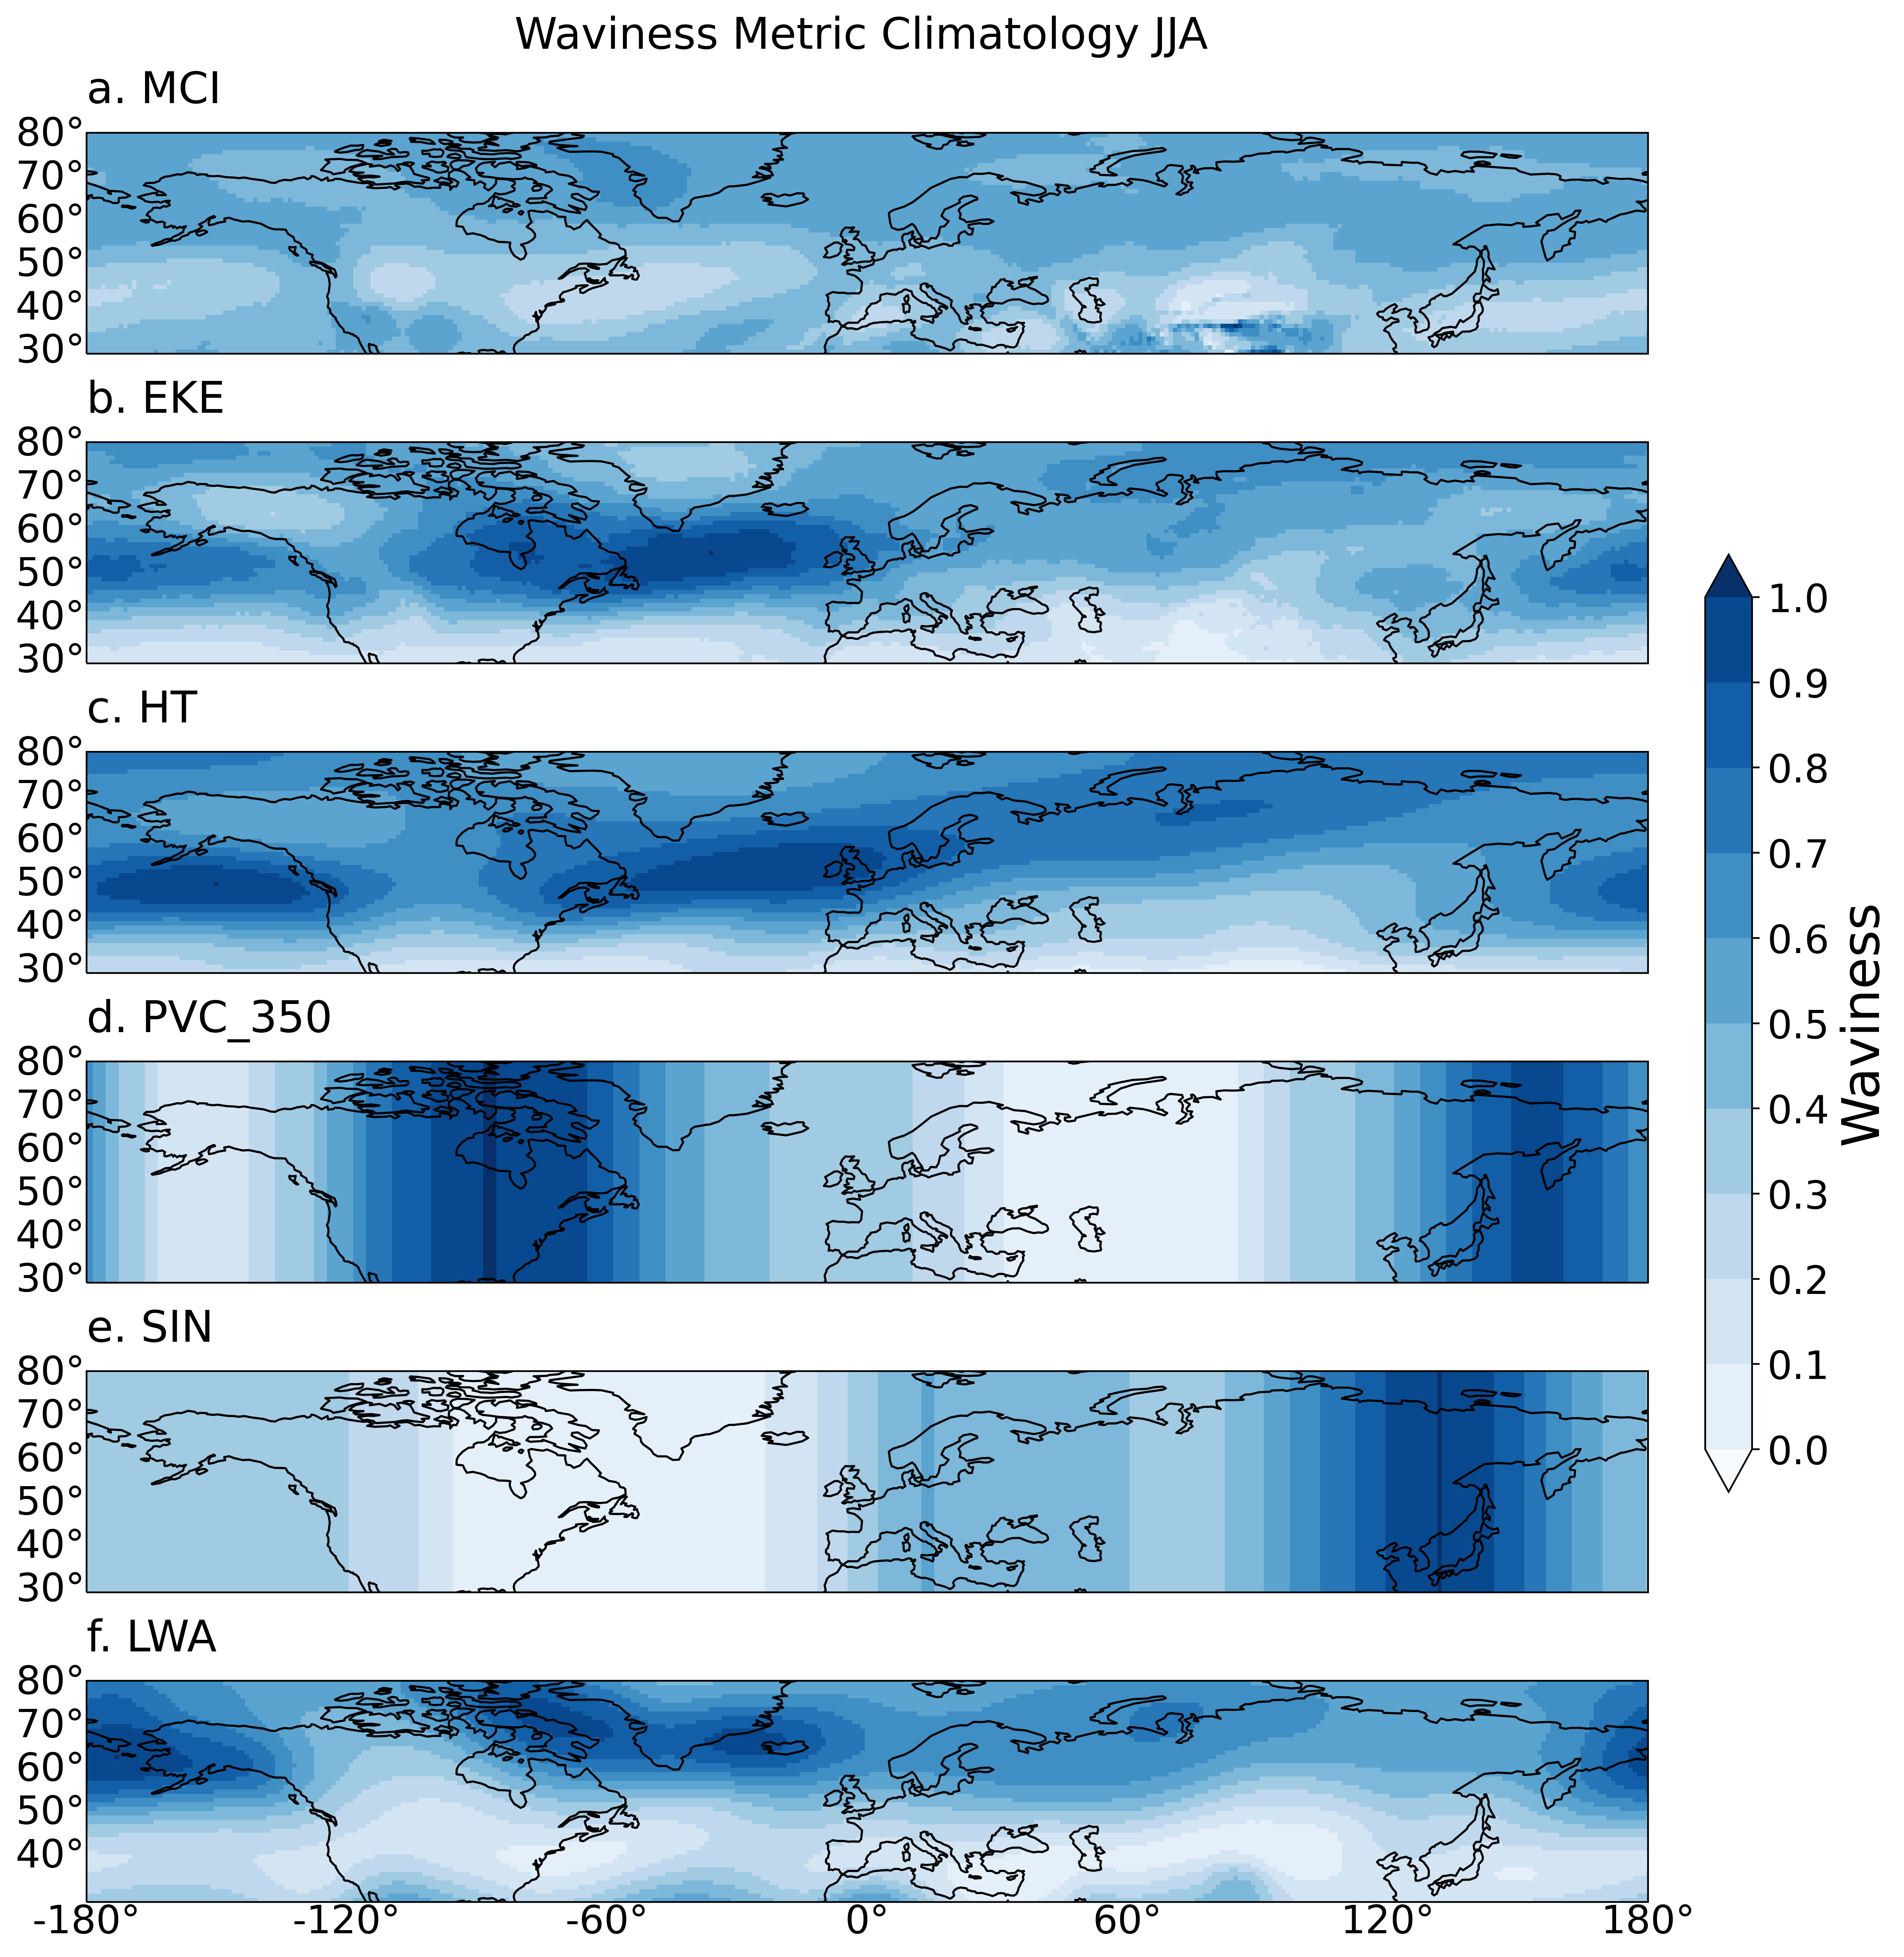

MCI
EKE
HT
PVC_320
SIN
LWA


/home/rwhite/eroocroft/.conda/envs/python3ext/lib/python3.7/site-packages/ipykernel_launcher.py:224: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/rwhite/eroocroft/.conda/envs/python3ext/lib/python3.7/site-packages/ipykernel_launcher.py:224: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


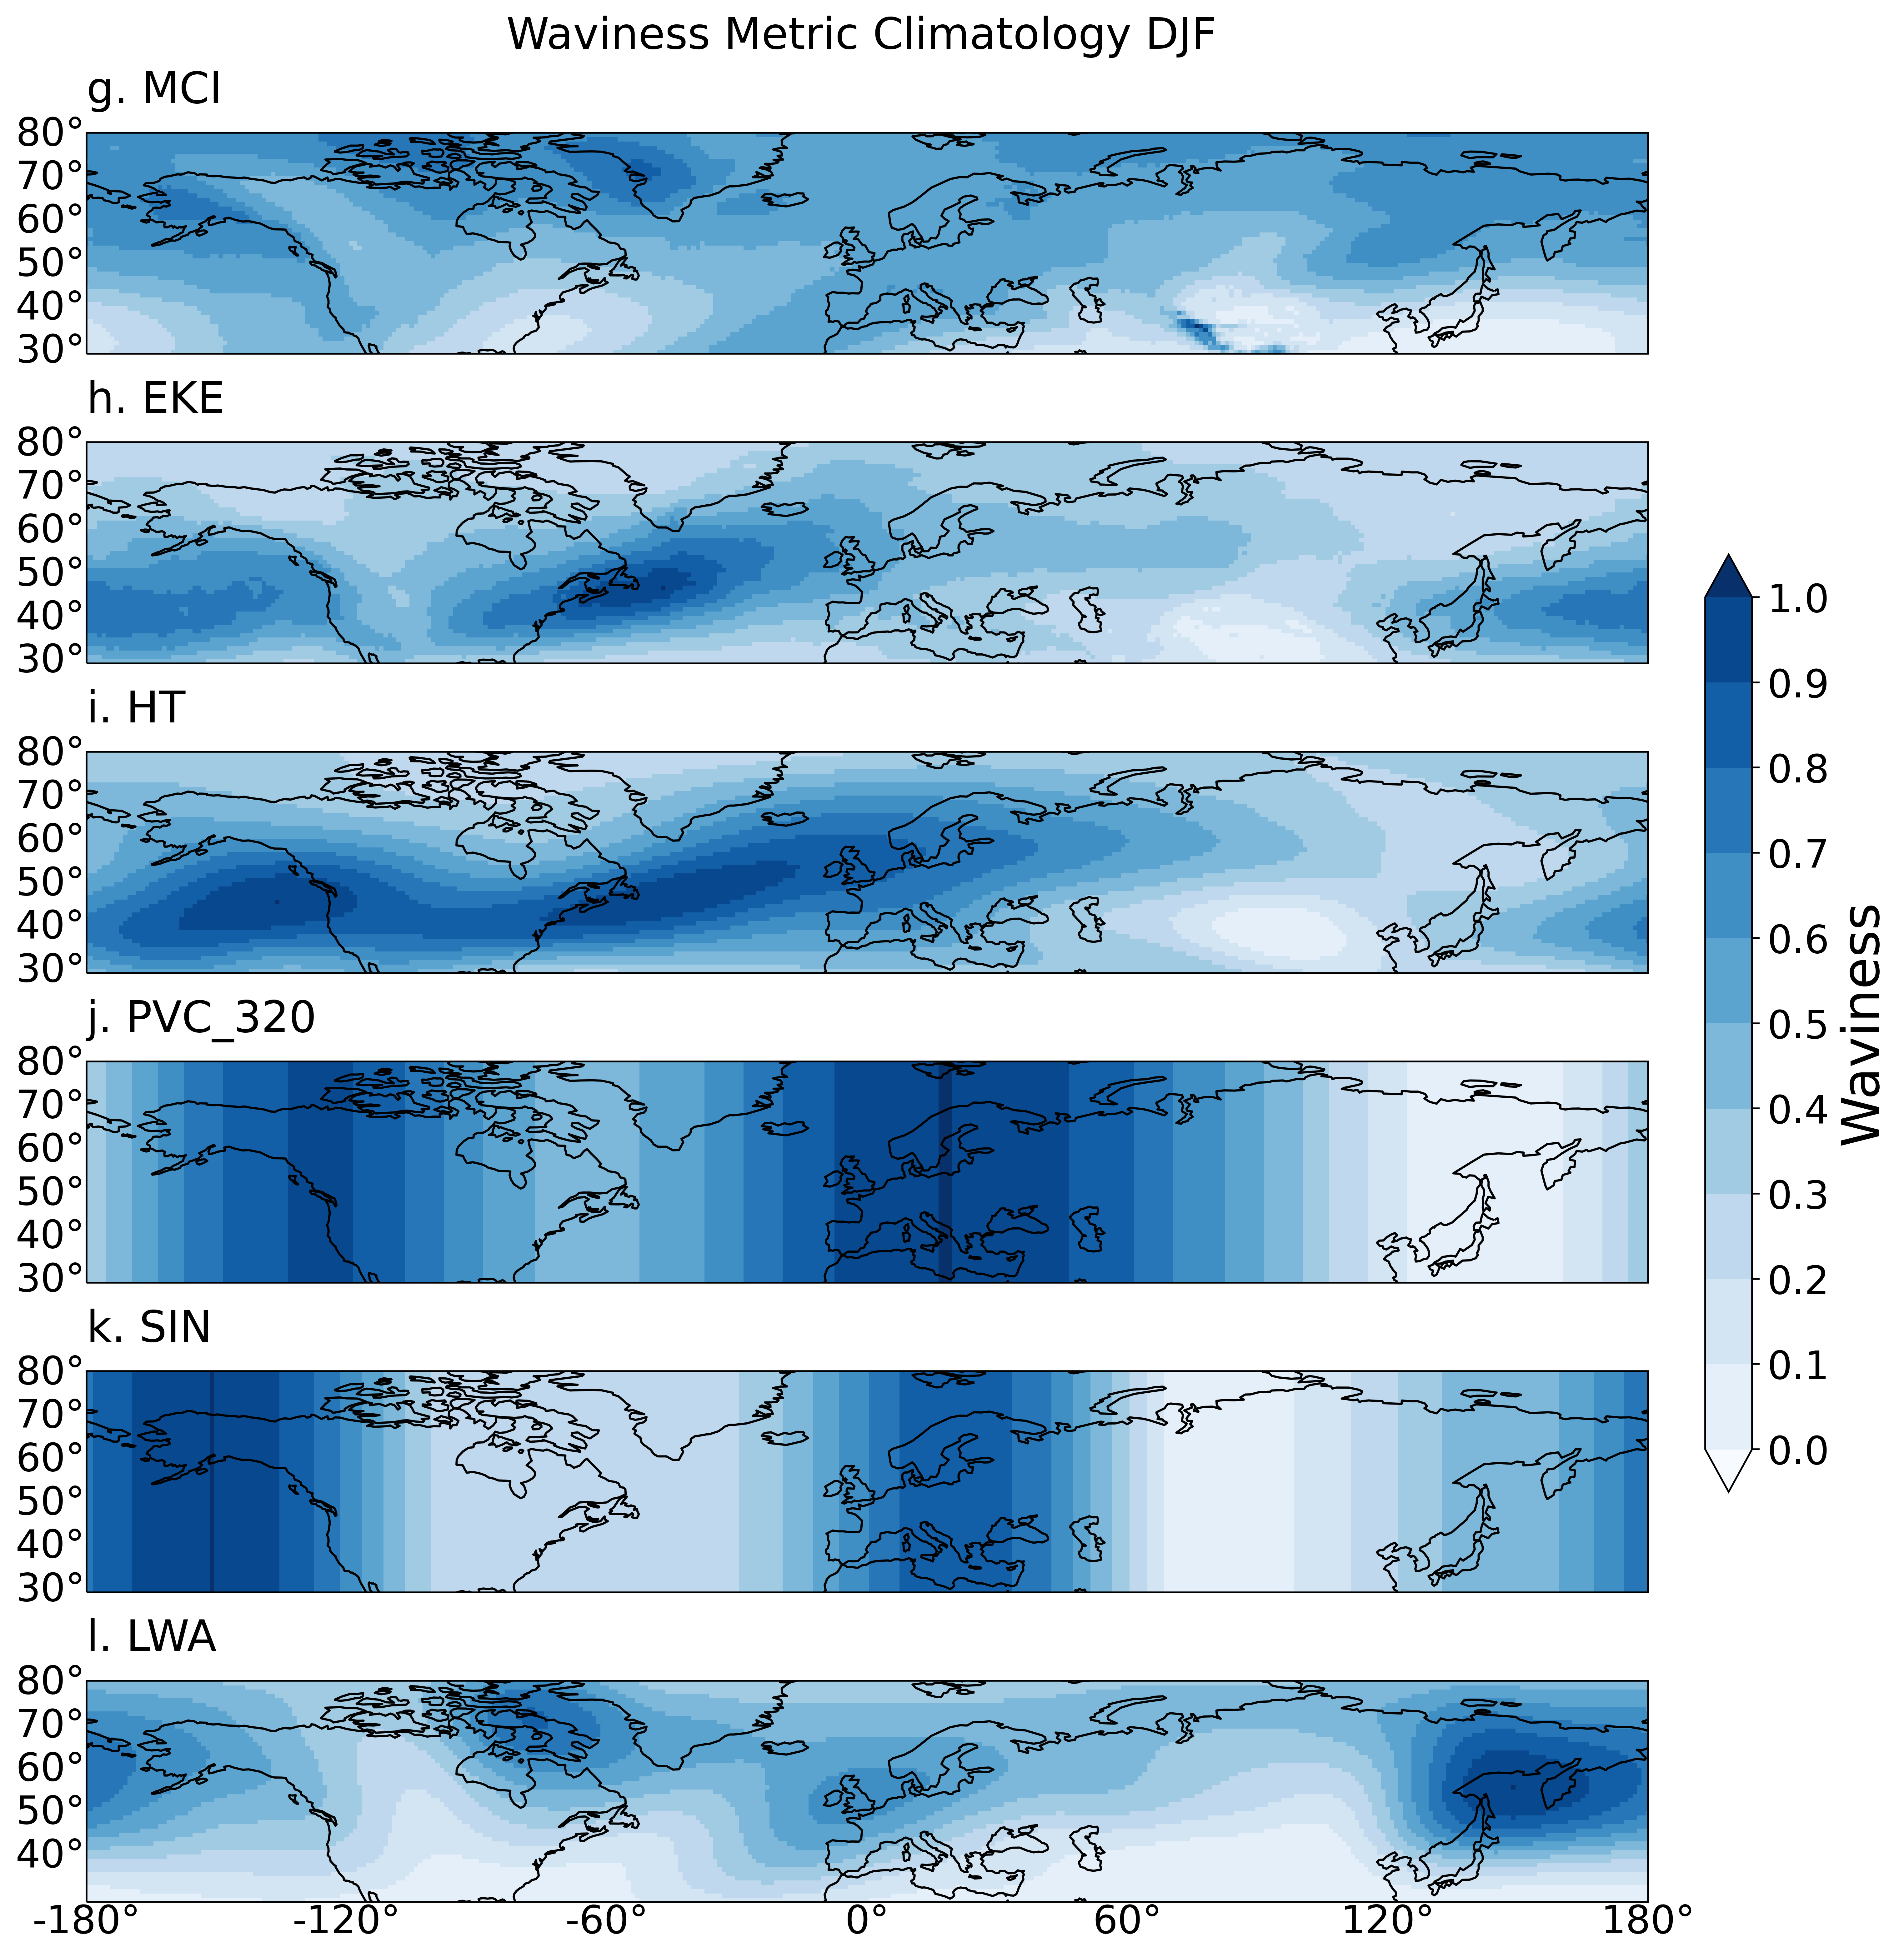

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import random
from datetime import datetime, timedelta
import scipy
from scipy import stats
from scipy import signal
import matplotlib.colors as mcolors
import string
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker






def custom_latitude_formatter(value, pos):
    # Convert the value to an absolute degree and append the degree symbol
    return f'{abs(int(value))}°'

def custom_longitude_formatter(value, pos):
    # Convert the value to an absolute degree and append the degree symbol
    return f'{int(value)}°'


z500 = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc').sel(latitude=slice(30,80))
LWA = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA_c', 'LWA_a'])
MCI = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024_abs.nc').sel(latitude=slice(30,80))
PVC = xr.open_dataset('//data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
PVC_330 = PVC.sel(theta=330).sel(latitude=slice(30,80))
PVC_320 = PVC.sel(theta=320).sel(latitude=slice(30,80))
PVC_350 = PVC.sel(theta=350).sel(latitude=slice(30,80))
HT = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/important_final_data/HT_final_MEAN_fixed.nc').sel(latitude=slice(30,80))
SIN = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/Sinuosity_data/sinuosity_combined4.nc').sel(latitude = slice(30,80))
EKE = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/2.5_6_day_filtered_ERA5_daily_500hPa_EKE.nc').drop_vars('weighted_EKE').sel(latitude = slice(30,80))
LWA_a = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_c'])
LWA_c = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_a'])


#wav_dict = {"Name":'Waviness Metric Climatology',"z500":z500, "LWA":LWA, "MCI":MCI, "PVC_320":PVC_320, "PVC_330":PVC_330, "HT":HT, "SIN":SIN, "EKE":EKE, "LWA_a":LWA_a, "LWA_c":LWA_c}


wav_dict = {"Name":'Waviness Metric Climatology JJA',"MCI":MCI,  "EKE":EKE, "HT":HT, "PVC_350":PVC_350, "SIN":SIN, "LWA":LWA}

color_range = np.linspace(0,1,11)

data_list = [wav_dict]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l = 0
w = -1 #which letter to start at (a=-1)
p = 6 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        if i =='LWA':
            waviness_variable = 'LWA'
        elif i =='LWA_a':
            waviness_variable = 'LWA_a'
        elif i =='LWA_c':
            waviness_variable = 'LWA_c'
        elif i =='HT':
            waviness_variable = 'v'
        elif i =='MCI':
            waviness_variable = 'v'
        elif i =='PVC':
            waviness_variable = '__xarray_dataarray_variable__'
        elif i =='PVC_320':
            waviness_variable = '__xarray_dataarray_variable__'
        elif i =='PVC_350':
            waviness_variable = '__xarray_dataarray_variable__'
        elif i =='SIN':
            waviness_variable = 'sinuosity'
        elif i =='z500':
            waviness_variable = 'z'
        elif i == 'EKE':
            waviness_variable = 'EKE'

        j = k[i]
                
        data = j[waviness_variable].isel(time=j.time.dt.month.isin([6, 7, 8])).mean(dim='time')
        data_min = data.min().item()
        data_max = data.max().item()
        data_norm = (data - data_min) / (data_max - data_min)


        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth = 0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
            
        gl.xlabel_style = {'size': 18} 
        gl.ylabel_style = {'size': 18}

        
        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

        pcm = data_norm.plot(ax=ax, transform=ccrs.PlateCarree(), levels = color_range, cmap = 'Blues', extend = 'both', add_colorbar = False, add_labels=False)#, cbar_kwargs={'shrink':0.4})
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 20)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.87, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Waviness', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    plt.suptitle(k.get('Name'), y=0.93, x = 0.51, fontsize=20)

    plt.show()




wav_dict = {"Name":'Waviness Metric Climatology DJF',"MCI":MCI,  "EKE":EKE, "HT":HT, "PVC_320":PVC_320, "SIN":SIN, "LWA":LWA}

color_range = np.linspace(0,1,11)

data_list = [wav_dict]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l = 0
w = 5 #which letter to start at (a=-1)
p = 6 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        if i =='LWA':
            waviness_variable = 'LWA'
        elif i =='LWA_a':
            waviness_variable = 'LWA_a'
        elif i =='LWA_c':
            waviness_variable = 'LWA_c'
        elif i =='HT':
            waviness_variable = 'v'
        elif i =='MCI':
            waviness_variable = 'v'
        elif i =='PVC':
            waviness_variable = '__xarray_dataarray_variable__'
        elif i =='PVC_320':
            waviness_variable = '__xarray_dataarray_variable__'
        elif i =='PVC_350':
            waviness_variable = '__xarray_dataarray_variable__'
        elif i =='SIN':
            waviness_variable = 'sinuosity'
        elif i =='z500':
            waviness_variable = 'z'
        elif i == 'EKE':
            waviness_variable = 'EKE'

        j = k[i]
        
        data = j[waviness_variable].isel(time=j.time.dt.month.isin([12, 1, 2])).mean(dim='time')
        data_min = data.min().item()
        data_max = data.max().item()
        data_norm = (data - data_min) / (data_max - data_min)


        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth = 0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
        
        gl.xlabel_style = {'size': 18} 
        gl.ylabel_style = {'size': 18}
        
        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

        pcm = data_norm.plot(ax=ax, transform=ccrs.PlateCarree(), levels = color_range, cmap = 'Blues', extend = 'both', add_colorbar = False, add_labels=False)#, cbar_kwargs={'shrink':0.4})
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 20)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.87, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Waviness', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    plt.suptitle(k.get('Name'), y=0.93, x = 0.51, fontsize=20)

    plt.show()




# Calculate PCC

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import random
from datetime import datetime, timedelta
import scipy

LWA = xr.open_dataset('/data/rwhite/shared/ERA5/z500_daily_LWA_changed_isolines_v3.nc').sel(latitude=slice(30,80), time=slice('1979-12-01','2015-08-31')).drop_vars(['LWA_c', 'LWA_a']).rename(LWA="waviness")
LWA_a = xr.open_dataset('/data/rwhite/shared/ERA5/z500_daily_LWA_changed_isolines_v3.nc').sel(latitude=slice(30,80), time=slice('1979-12-01','2015-08-31')).drop_vars(['LWA_c', 'LWA']).rename(LWA_a="waviness")
LWA_c = xr.open_dataset('/data/rwhite/shared/ERA5/z500_daily_LWA_changed_isolines_v3.nc').sel(latitude=slice(30,80), time=slice('1979-12-01','2015-08-31')).drop_vars(['LWA', 'LWA_a']).rename(LWA_c="waviness")
HT = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/HT_spatial_average_1D_combined.nc').sel(latitude=slice(30,80), time=slice('1979-12-01','2015-08-31')).rename(v="waviness")
MCI = xr.open_dataset('/data/rwhite/eroocroft/MCI_waviness_no_lon_avg_abs.nc').sel(latitude=slice(30,80), time=slice('1979-12-01','2015-08-31')).rename(__xarray_dataarray_variable__="waviness")
PVC = xr.open_dataset('/data/rwhite/eroocroft/PVC_ERA5_data/PVC_ERA5_1979_2015_320K_330K_350K_full_waviness.nc')
lat_range = np.arange(30, 81)
lat_coords = xr.DataArray(lat_range, dims='latitude')
PVC = PVC.broadcast_like(lat_coords)
PVC['latitude'] = lat_coords
PVC['time'] = PVC['time'].dt.floor('D')
PVC_320 = PVC.sel(level=320, time=slice('1979-12-01','2015-08-31'))
PVC_330 = PVC.sel(level=330, time=slice('1979-12-01','2015-08-31'))
PVC_350 = PVC.sel(level=350, time=slice('1979-12-01','2015-08-31'))
SIN = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/Sinuosity_data/sinuosity_combined4.nc').sel(latitude = slice(30,80), time=slice('1979-12-01','2015-08-31')).rename(sinuosity="waviness")
z500 = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/ERA5_geopotential_z500_daily_minus_zonal_mean.nc').sel(latitude = slice(30,80), time=slice('1979-12-01','2015-08-31')).rename(z="waviness")
EKE = xr.open_dataset('/data/rwhite/eroocroft/2.5_6_day_filtered_wind_ERA5_daily_500hPa_EKE_1x1_v2_lat_weighted.nc').sel(latitude = slice(30,80), time=slice('1979-12-01','2015-08-31')).rename(EKE="waviness")


print('done')

datasets_dict = {
    'EKE':EKE,
    'LWA': LWA,
    'LWA_a': LWA_a,
    'LWA_c': LWA_c,
    'MCI': MCI,
    'HT': HT,
    'PVC_320': PVC_320,
    'PVC_350': PVC_350,
    'SIN': SIN,
    'z500': z500
}

which_LWA_list = list(datasets_dict.keys())

for i in range(len(which_LWA_list)):
    for j in range(i + 1, len(which_LWA_list)):
        ds1_name = which_LWA_list[i]
        ds2_name = which_LWA_list[j]
        
        ds1 = datasets_dict[ds1_name]
        ds2 = datasets_dict[ds2_name]
        print(i)
        print(ds1,ds2)
        
        ds1 = ds1.load()
        ds2 = ds2.load()

        ds1_JJA = ds1.isel(time=ds1.time.dt.month.isin([6, 7, 8]))
        ds2_JJA = ds2.isel(time=ds2.time.dt.month.isin([6, 7, 8]))
        ds1_DJF = ds1.isel(time=ds1.time.dt.month.isin([12, 1, 2]))
        ds2_DJF = ds2.isel(time=ds2.time.dt.month.isin([12, 1, 2]))
        #print('done')
        #print(ds1['waviness'], ds2['waviness'])
        correlation_result = xr.corr(ds1['waviness'], ds2['waviness'])
        p_value, q_value = scipy.stats.pearsonr(ds1['waviness'].values.ravel(), ds2['waviness'].values.ravel())
        print('done')

        correlation_result_JJA = xr.corr(ds1_JJA['waviness'], ds2_JJA['waviness'])
        #print('done')
        correlation_result_DJF = xr.corr(ds1_DJF['waviness'], ds2_DJF['waviness'])
        correlation_result_szns_average = np.mean([correlation_result_JJA,correlation_result_DJF])
        
        print(f'Correlation between {ds1_name} and {ds2_name}:')
        print(correlation_result.values)
        print(p_value, q_value)

        print(f'Correlation between {ds1_name} and {ds2_name} in JJA:')
        print(correlation_result_JJA.values)
        print(f'Correlation between {ds1_name} and {ds2_name} in DJF:')
        print(correlation_result_DJF.values)
        print(f'Correlation average between {ds1_name} and {ds2_name} JJA/DJF seasons:')
        print(correlation_result_szns_average)
        
        print()

# Calculate Hemispheric Connections

In [ ]:
###JJA###


import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import random
from datetime import datetime, timedelta
import scipy
from scipy.stats import linregress

color_range = [0.25,0.33,0.4,0.5,0.66,1,1.5,2,2.5,3,4]

Metric_list = ['LWA','MCI', 'PVC_350', 'SIN', 'EKE', 'HT']


t_data = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
t_data = t_data.isel(time=t_data.time.dt.month.isin([6, 7, 8]))
t_data_q5 = t_data.quantile(0.95, dim='time', interpolation='midpoint')

masked_temp = (t_data.temperature >= t_data_q5).astype(int)

latitudes = masked_temp.latitude
lat_weights = np.cos(np.deg2rad(latitudes))  

lat_weights_expanded = lat_weights.broadcast_like(masked_temp.temperature)

weighted_extreme_area = (masked_temp.temperature * lat_weights_expanded).sum(dim=["latitude", "longitude"])

total_weighted_area = lat_weights_expanded.sum(dim=["latitude", "longitude"])

percent_extreme_area = (weighted_extreme_area / total_weighted_area) * 100

mean_percent_extreme_area = percent_extreme_area.mean().item()
print(f"Mean % of extreme temperature area: {mean_percent_extreme_area:.2f}%")


for Metric in Metric_list:
    print(Metric)
    if Metric == 'LWA':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA_c', 'LWA_a'])
        
    elif Metric == 'LWA_a':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_c'])
    
    elif Metric == 'LWA_c':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_a'])
        
    elif Metric == 'MCI':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024_abs.nc').sel(latitude=slice(30,80))

    elif Metric == 'PVC_350':
        PVC = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
        avg_wav = PVC.sel(theta=350)
    
    elif Metric == 'PVC_330':
        PVC = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
        avg_wav = PVC.sel(theta=330)
    
    elif Metric == 'PVC_320':
        PVC = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
        avg_wav = PVC.sel(theta=320)
    
    elif Metric == 'HT':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/important_final_data/HT_final_MEAN_fixed.nc').sel(latitude=slice(30,80)).squeeze()
    
    elif Metric == 'SIN':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/Sinuosity_data/sinuosity_combined4.nc').sel(latitude = slice(30,80))
   
    elif Metric == 'EKE':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/2.5_6_day_filtered_ERA5_daily_500hPa_EKE.nc').drop_vars('weighted_EKE').sel(latitude = slice(30,80))

    elif Metric == 'Z500':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc').sel(latitude=slice(80,30))
    
    avg_wav['time'] = avg_wav['time'].dt.floor('D')
    avg_wav = avg_wav.isel(time=avg_wav.time.dt.month.isin([6, 7, 8]))

    print(avg_wav)



    latitudes = avg_wav.latitude
    lat_weights = np.cos(np.deg2rad(latitudes))  

    variable_name = list(avg_wav.data_vars)[0]
    
    lat_weights_expanded = lat_weights.broadcast_like(avg_wav[variable_name])
    weighted_wav_area = (avg_wav[variable_name] * lat_weights_expanded).mean(dim=["latitude", "longitude"])
    common_time = np.intersect1d(weighted_wav_area.time.values, percent_extreme_area.time.values)
    mean_lwa = weighted_wav_area.sel(time=common_time)
    percent_extreme_area = percent_extreme_area.sel(time=common_time)






    slope, intercept, r_value, p_value, std_err = linregress(percent_extreme_area, mean_lwa)
    regression_line = slope * percent_extreme_area + intercept

    plt.figure(figsize=(10, 6))

    plt.scatter(percent_extreme_area, mean_lwa, color='b', alpha=0.5)
    plt.plot(percent_extreme_area, regression_line, color='r', label=f"R² = {r_value**2:.2g}")
    plt.xlabel("Temperature Area > 95%", size = 30)
    plt.ylabel(str(Metric), size = 30)
    plt.title(str(Metric), size = 30)
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=18)

    plt.tight_layout()
    outdir = "/home/rwhite/eroocroft/jupyter/notebooks/Chapter_1_2024_data"
    #plt.savefig(f"{outdir}/{Metric}_JJA_regression_v2.png", dpi=300, bbox_inches="tight")


    plt.show()


In [ ]:
########
#DJF#
#######
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import random
from datetime import datetime, timedelta
import scipy
from scipy.stats import linregress

color_range = [0.25,0.33,0.4,0.5,0.66,1,1.5,2,2.5,3,4]

Metric_list = ['LWA','MCI', 'PVC_320', 'SIN', 'EKE', 'HT']

t_data = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
t_data = t_data.isel(time=t_data.time.dt.month.isin([12, 1, 2]))
t_data_q5 = t_data.quantile(0.05, dim='time', interpolation='midpoint')

masked_temp = (t_data.temperature <= t_data_q5).astype(int)

latitudes = masked_temp.latitude
lat_weights = np.cos(np.deg2rad(latitudes))  

lat_weights_expanded = lat_weights.broadcast_like(masked_temp.temperature)

weighted_extreme_area = (masked_temp.temperature * lat_weights_expanded).sum(dim=["latitude", "longitude"])

total_weighted_area = lat_weights_expanded.sum(dim=["latitude", "longitude"])

percent_extreme_area = (weighted_extreme_area / total_weighted_area) * 100

mean_percent_extreme_area = percent_extreme_area.mean().item()
print(f"Mean % of extreme temperature area: {mean_percent_extreme_area:.2f}%")


for Metric in Metric_list:
    print(Metric)
    if Metric == 'LWA':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA_c', 'LWA_a'])
        
    elif Metric == 'LWA_a':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_c'])
    
    elif Metric == 'LWA_c':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_a'])
        
    elif Metric == 'MCI':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024_abs.nc').sel(latitude=slice(30,80))

    elif Metric == 'PVC_350':
        PVC = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
        avg_wav = PVC.sel(theta=350)
    
    elif Metric == 'PVC_330':
        PVC = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
        avg_wav = PVC.sel(theta=330)
    
    elif Metric == 'PVC_320':
        PVC = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
        avg_wav = PVC.sel(theta=320)
    
    elif Metric == 'HT':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/important_final_data/HT_final_MEAN_fixed.nc').sel(latitude=slice(30,80)).squeeze()
    
    elif Metric == 'SIN':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/Sinuosity_data/sinuosity_combined4.nc').sel(latitude = slice(30,80))
   
    elif Metric == 'EKE':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/2.5_6_day_filtered_ERA5_daily_500hPa_EKE.nc').drop_vars('weighted_EKE').sel(latitude = slice(30,80))

    elif Metric == 'Z500':
        avg_wav = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc').sel(latitude=slice(80,30))
    
    avg_wav['time'] = avg_wav['time'].dt.floor('D')
    avg_wav = avg_wav.isel(time=avg_wav.time.dt.month.isin([12, 1, 2]))

    print(avg_wav)



    latitudes = avg_wav.latitude
    lat_weights = np.cos(np.deg2rad(latitudes))  
    
    variable_name = list(avg_wav.data_vars)[0]
    
    lat_weights_expanded = lat_weights.broadcast_like(avg_wav[variable_name])
    weighted_wav_area = (avg_wav[variable_name] * lat_weights_expanded).mean(dim=["latitude", "longitude"])
    common_time = np.intersect1d(weighted_wav_area.time.values, percent_extreme_area.time.values)
    mean_lwa = weighted_wav_area.sel(time=common_time)
    percent_extreme_area = percent_extreme_area.sel(time=common_time)






    slope, intercept, r_value, p_value, std_err = linregress(percent_extreme_area, mean_lwa)
    regression_line = slope * percent_extreme_area + intercept

    plt.figure(figsize=(10, 6))

    plt.scatter(percent_extreme_area, mean_lwa, color='b', alpha=0.5)
    plt.plot(percent_extreme_area, regression_line, color='r', label=f"R² = {r_value**2:.2g}")
    plt.xlabel("Temperature Area < 5%", size = 30)
    plt.ylabel(str(Metric), size = 30)
    plt.title(str(Metric), size = 30)
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=18)

    plt.tight_layout()
    outdir = "/home/rwhite/eroocroft/jupyter/notebooks/Chapter_1_2024_data"
   # plt.savefig(f"{outdir}/{Metric}_DJF_regression.png", dpi=300, bbox_inches="tight")

    plt.show()


# Calculate Colocations

In [ ]:
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import random
from datetime import datetime, timedelta
import scipy

x=50
y=-120

i=0

#JJA

Metric_list = ['MCI','EKE','HT','PVC','SIN','LWA','LWA_a', 'LWA_c']

HE_JJA_t_data_szn_daily = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mx2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
HE_JJA_t_data_szn_daily = HE_JJA_t_data_szn_daily.isel(time=HE_JJA_t_data_szn_daily.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
HE_JJA_lat_lon_point = HE_JJA_t_data_szn_daily.sel(latitude = x, longitude = y)
HE_JJA_lat_lon_point_q1 = HE_JJA_lat_lon_point.quantile(0.05, dim = 'time',interpolation = 'midpoint')
HE_JJA_lat_lon_point_q4 = HE_JJA_lat_lon_point.quantile(0.95, dim = 'time',interpolation = 'midpoint')
HE_JJA_lat_lon_point_q4_mask = xr.where(HE_JJA_lat_lon_point >= HE_JJA_lat_lon_point_q4, 1, 0)

JJA_or_DJF = 'JJA'

z500_dataset = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc')
z500_dataset = z500_dataset.sel(latitude = slice(80,30))
z500_dataset = z500_dataset.isel(time=z500_dataset.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
z500_anomalies_climatology = z500_dataset.mean(dim='time')
z500_anomalies = z500_dataset - z500_anomalies_climatology

HE_JJA_q4_mask = HE_JJA_lat_lon_point_q4_mask['temperature'].reindex(time=z500_anomalies.time, method='nearest')  # Align time
mask = HE_JJA_q4_mask == 1
#valid_times = z500_anomalies.time.where(HE_JJA_q4_mask == 1, drop=True)
#z500_anomalies_HE = z500_anomalies.sel(time=valid_times)
z500_anomalies_HE = z500_anomalies.where(mask, drop=True)

print('calculated z500')
for Metric in Metric_list:
    print(Metric)
    if Metric =='LWA':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA_c', 'LWA_a'])
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'LWA'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='LWA_a':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_c'])
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'LWA_a'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='LWA_c':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_a'])
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'LWA_c'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='HT':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/important_final_data/HT_final_MEAN_fixed.nc').sel(latitude=slice(30,80))
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'v'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='MCI':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024_abs.nc').sel(latitude=slice(30,80))
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'v'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='PVC' and JJA_or_DJF == 'JJA':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
        waviness_metric = waviness_metric.sel(theta=350)
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        waviness_variable = '__xarray_dataarray_variable__'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='PVC' and JJA_or_DJF == 'DJF':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
        waviness_metric = waviness_metric.sel(theta=320)
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        waviness_variable = '__xarray_dataarray_variable__'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='SIN':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/Sinuosity_data/sinuosity_combined4.nc').sel(latitude = slice(30,80))
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'sinuosity'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='EKE':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/2.5_6_day_filtered_ERA5_daily_500hPa_EKE.nc').drop_vars('weighted_EKE').sel(latitude = slice(30,80))
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'EKE'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='Z500':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc').sel(latitude=slice(80,30))
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([6, 7, 8])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'z'
        waviness_metric_climatology = waviness_metric.mean(dim='time')

    rename_dict_waviness = {waviness_variable: "waviness"}
    print('calculated climatology')
    waviness_metric['time'] = waviness_metric['time'].dt.floor('D')
    waviness_metric_lat_lon_point = waviness_metric - waviness_metric_climatology
    waviness_metric_lat_lon_point = waviness_metric_lat_lon_point.where(HE_JJA_lat_lon_point_q4_mask['temperature'] == 1)
    waviness_metric_lat_lon_point = waviness_metric_lat_lon_point.rename(rename_dict_waviness)

    color_range = [0.25,0.33,0.4,0.5,0.66,1,1.5,2,2.5,3,4]

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
    gl.top_labels = False
    gl.right_labels = False
    if Metric =='LWA_c':
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14, 'rotation': 0}
    gl.rotate_labels = False


    waviness_metric_lat_lon_point.waviness.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', add_labels=False, extend = 'both', cbar_kwargs={'shrink':0.3})
    cs = ax.contour(z500_anomalies_HE.longitude, z500_anomalies_HE.latitude, z500_anomalies_HE.z.mean(dim='time'), colors='k', linewidths=1, transform=ccrs.PlateCarree())
    ax.clabel(cs, fmt='%d', fontsize=8)
    ax.scatter(y, x, color='cyan', marker='o', s=10, transform=ccrs.PlateCarree(), label='40N, 356W')
    ax.set_title(f"{chr(97+i)}. {Metric}", fontsize=20, loc='left')
    i = i+1
    plt.show()





In [ ]:
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import random
from datetime import datetime, timedelta
import scipy

x=50
y=-120

i=8

CE_DJF_t_data_szn_daily = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/ERA5_temperature/ERA5_mn2t_daily_1979_2024_anomalies.nc') #THIS DEPENDS ON MIN OR MAX T
CE_DJF_t_data_szn_daily = CE_DJF_t_data_szn_daily.isel(time=CE_DJF_t_data_szn_daily.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
CE_DJF_lat_lon_point = CE_DJF_t_data_szn_daily.sel(latitude = x, longitude = y)
CE_DJF_lat_lon_point_q1 = CE_DJF_lat_lon_point.quantile(0.05, dim = 'time',interpolation = 'midpoint')
CE_DJF_lat_lon_point_q4 = CE_DJF_lat_lon_point.quantile(0.95, dim = 'time',interpolation = 'midpoint')
CE_DJF_lat_lon_point_q1_mask = xr.where(CE_DJF_lat_lon_point <= CE_DJF_lat_lon_point_q1, 1, 0)

JJA_or_DJF = 'DJF'


z500_dataset = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc')
z500_dataset = z500_dataset.sel(latitude = slice(80,30))
z500_dataset = z500_dataset.isel(time=z500_dataset.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
z500_anomalies_climatology = z500_dataset.mean(dim='time')
z500_anomalies = z500_dataset - z500_anomalies_climatology

CE_DJF_q4_mask = CE_DJF_lat_lon_point_q1_mask['temperature'].reindex(time=z500_anomalies.time, method='nearest')  # Align time
mask = CE_DJF_q4_mask == 1
z500_anomalies_CE = z500_anomalies.where(mask, drop=True)
print('calculated z500')

Metric_list = ['MCI','EKE','HT','PVC','SIN','LWA','LWA_a', 'LWA_c']


for Metric in Metric_list:
    print(Metric)
    if Metric =='LWA':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA_c', 'LWA_a'])
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'LWA'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='LWA_a':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_c'])
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'LWA_a'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='LWA_c':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/ERA5_z500_1979_2024_LWA.nc').sel(latitude=slice(30,80)).drop_vars(['LWA', 'LWA_a'])
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'LWA_c'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='HT':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/important_final_data/HT_final_MEAN_fixed.nc').sel(latitude=slice(30,80))
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'v'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='MCI':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/MCI_ERA5_1979_2024_abs.nc').sel(latitude=slice(30,80))
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'v'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='PVC' and JJA_or_DJF == 'JJA':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
        waviness_metric = waviness_metric.sel(theta=350)
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        waviness_variable = '__xarray_dataarray_variable__'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='PVC' and JJA_or_DJF == 'DJF':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/PVC_ERA5_1979_2024_320K_330K_350K_lon_lat_expanded.nc')
        waviness_metric = waviness_metric.sel(theta=320)
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        waviness_variable = '__xarray_dataarray_variable__'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='SIN':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/Chapter_1/Sinuosity_data/sinuosity_combined4.nc').sel(latitude = slice(30,80))
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'sinuosity'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='EKE':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/2.5_6_day_filtered_ERA5_daily_500hPa_EKE.nc').drop_vars('weighted_EKE').sel(latitude = slice(30,80))
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'EKE'
        waviness_metric_climatology = waviness_metric.mean(dim='time')
    elif Metric =='Z500':
        waviness_metric = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/Waviness_metrics/Z500_ERA5_1979_2024.nc').sel(latitude=slice(80,30))
        waviness_metric = waviness_metric.isel(time=waviness_metric.time.dt.month.isin([12, 1, 2])) # DEPENDS ON DJF OR JJA
        waviness_variable = 'z'
        waviness_metric_climatology = waviness_metric.mean(dim='time')

    rename_dict_waviness = {waviness_variable: "waviness"}

    waviness_metric['time'] = waviness_metric['time'].dt.floor('D')
    waviness_metric_lat_lon_point = waviness_metric - waviness_metric_climatology
    waviness_metric_lat_lon_point = waviness_metric_lat_lon_point.where(CE_DJF_lat_lon_point_q1_mask['temperature'] == 1)
    waviness_metric_lat_lon_point = waviness_metric_lat_lon_point.rename(rename_dict_waviness)
    print('calculated climatology')

    color_range = [0.25,0.33,0.4,0.5,0.66,1,1.5,2,2.5,3,4]

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
    gl.top_labels = False
    gl.right_labels = False
    if Metric =='LWA_c':
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14, 'rotation': 0}
    gl.rotate_labels = False

    waviness_metric_lat_lon_point.waviness.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', add_labels=False, extend = 'both', cbar_kwargs={'shrink': 0.3})
    cs = ax.contour(z500_anomalies_CE.longitude, z500_anomalies_CE.latitude, z500_anomalies_CE.z.mean(dim='time'), colors='k', linewidths=1, transform=ccrs.PlateCarree())
    ax.clabel(cs, fmt='%d', fontsize=8) 
    ax.scatter(y, x, color='cyan', marker='o', s=10, transform=ccrs.PlateCarree(), label='40N, 356W')
    ax.set_title(f"{chr(97+i)}. {Metric}", fontsize=20, loc='left')
    i = i+1
    
    plt.show()



# Create figures for PR

In [ ]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import random
from datetime import datetime, timedelta
import scipy
from scipy import stats
from scipy import signal
import matplotlib.colors as mcolors
import string
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker




def grid_cell_area(lat1, lat2, lon1, lon2):
    R = 6371.0  # Earth radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    avg_lat = np.radians((lat1 + lat2) / 2.0)
    a = R**2 * dlat * dlon * np.cos(avg_lat)
    return a

def custom_latitude_formatter(value, pos):
    # Convert the value to an absolute degree and append the degree symbol
    return f'{abs(int(value))}°'

def custom_longitude_formatter(value, pos):
    # Convert the value to an absolute degree and append the degree symbol
    return f'{int(value)}°'


#dataset_name = '_maxt'

z500_PR_maxt = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_z500_Max_T_1980_2024.nc')
LWA_PR_maxt = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_LWA_Max_T_1980_2024.nc')
MCI_PR_maxt = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_MCI_Max_T_1980_2024.nc')
PVC_PR_maxt = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_PVC_Max_T_1980_2024.nc')
HT_PR_maxt = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_HT_Max_T_1980_2015_MEAN_fixed.nc')
SIN_PR_maxt = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_SIN_Max_T_1980_2024.nc')
EKE_PR_maxt = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_EKE_Max_T_1980_2024.nc')
LWA_a_PR_maxt = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_LWA_a_Max_T_1980_2024.nc')
LWA_c_PR_maxt = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_LWA_c_Max_T_1980_2024.nc')

PR_dict_maxt = {"Name":'Maximum Temperature JJA', "MCI":MCI_PR_maxt, "EKE":EKE_PR_maxt, "HT":HT_PR_maxt, "PVC":PVC_PR_maxt, "SIN":SIN_PR_maxt,"LWA":LWA_PR_maxt,"LWA_a":LWA_a_PR_maxt,"LWA_c":LWA_c_PR_maxt}
PR_dict_maxt_z500 = {"Name":'Maximum Temperature JJA', "z500":z500_PR_maxt, "MCI":MCI_PR_maxt, "EKE":EKE_PR_maxt, "HT":HT_PR_maxt, "PVC":PVC_PR_maxt, "SIN":SIN_PR_maxt,"LWA":LWA_PR_maxt,"LWA_a":LWA_a_PR_maxt,"LWA_c":LWA_c_PR_maxt}
z500_PR_dict_maxt = {"Name":'Maximum Temperature JJA', "z500":z500_PR_maxt, "LWA_a":LWA_a_PR_maxt}

z500_PR_mint = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_low_DJF_z500_Min_T_1980_2024.nc')
LWA_PR_mint = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_LWA_Min_T_1980_2024.nc')
MCI_PR_mint = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_MCI_Min_T_1980_2024.nc')
PVC_PR_mint = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_PVC_Min_T_1980_2024.nc')
HT_PR_mint = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_HT_Min_T_1980_2015_MEAN_fixed.nc')
SIN_PR_mint = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_SIN_Min_T_1980_2024.nc')
EKE_PR_mint = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_EKE_Min_T_1980_2024.nc')
LWA_a_PR_mint = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_LWA_a_Min_T_1980_2024.nc')
LWA_c_PR_mint = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_LWA_c_Min_T_1980_2024.nc')

PR_dict_mint = {"Name":'Minimum Temperature DJF', "MCI":MCI_PR_mint, "EKE":EKE_PR_mint, "HT":HT_PR_mint, "PVC":PVC_PR_mint, "SIN":SIN_PR_mint, "LWA":LWA_PR_mint, "LWA_a":LWA_a_PR_mint,"LWA_c":LWA_c_PR_mint}
PR_dict_mint_z500 = {"Name":'Minimum Temperature DJF', "z500":z500_PR_mint, "MCI":MCI_PR_mint, "EKE":EKE_PR_mint, "HT":HT_PR_mint, "PVC":PVC_PR_mint, "SIN":SIN_PR_mint, "LWA":LWA_PR_mint, "LWA_a":LWA_a_PR_mint,"LWA_c":LWA_c_PR_mint}
z500_PR_dict_mint = {"Name":'Minimum Temperature DJF', "z500":z500_PR_mint, "LWA_c":LWA_c_PR_mint}


z500_PR_maxt_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_z500_JJA_Max_T.nc')
LWA_PR_maxt_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_LWA_JJA_Max_T.nc')
MCI_PR_maxt_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_MCI_JJA_Max_T.nc')
PVC_PR_maxt_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_PVC_JJA_Max_T_v2.nc')
HT_PR_maxt_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_HT_JJA_Max_T.nc')
SIN_PR_maxt_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_SIN_JJA_Max_T.nc')
EKE_PR_maxt_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_EKE_JJA_Max_T.nc')
LWA_a_PR_maxt_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_LWA_a_JJA_Max_T.nc')
LWA_c_PR_maxt_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_LWA_c_JJA_Max_T.nc')

PR_dict_maxt_NN = {"Name":'Maximum Temperature JJA',"z500":z500_PR_maxt_NN, "MCI":MCI_PR_maxt_NN, "EKE":EKE_PR_maxt_NN, "HT":HT_PR_maxt_NN, "PVC":PVC_PR_maxt_NN, "SIN":SIN_PR_maxt_NN, "LWA":LWA_PR_maxt_NN, "LWA_a":LWA_a_PR_maxt_NN,"LWA_c":LWA_c_PR_maxt_NN}


z500_PR_mint_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_z500_DJF_Min_T.nc')
LWA_PR_mint_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_LWA_DJF_Min_T.nc')
MCI_PR_mint_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_MCI_DJF_Min_T.nc')
PVC_PR_mint_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_PVC_DJF_Min_T_v2.nc')
HT_PR_mint_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_HT_DJF_Min_T.nc')
SIN_PR_mint_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_SIN_DJF_Min_T.nc')
EKE_PR_mint_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_EKE_DJF_Min_T.nc')
LWA_a_PR_mint_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_LWA_a_DJF_Min_T.nc')
LWA_c_PR_mint_NN = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_NN/PR_high_NN_LWA_c_DJF_Min_T.nc')

PR_dict_mint_NN = {"Name":'Minimum Temperature DJF',"z500":z500_PR_mint_NN, "MCI":MCI_PR_mint_NN, "EKE":EKE_PR_mint_NN, "HT":HT_PR_mint_NN, "PVC":PVC_PR_mint_NN, "SIN":SIN_PR_mint_NN, "LWA":LWA_PR_mint_NN, "LWA_a":LWA_a_PR_mint_NN,"LWA_c":LWA_c_PR_mint_NN}


LWA_PR_maxt_nla = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_LWA_Max_T_1980_2024.nc')
MCI_PR_maxt_nla = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_MCI_Max_T_1980_2024.nc')
EKE_PR_maxt_nla = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_EKE_Max_T_1980_2024.nc')
LWA_a_PR_maxt_nla = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_LWA_a_Max_T_1980_2024.nc')
LWA_c_PR_maxt_nla = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_JJA_LWA_c_Max_T_1980_2024.nc')

PR_dict_maxt_no_lon_avg = {"Name":'Without Longitudinal Averaging', "MCI":MCI_PR_maxt_nla, "LWA":LWA_PR_maxt_nla,"LWA_a":LWA_a_PR_maxt_nla,"LWA_c":LWA_c_PR_maxt_nla, "EKE":EKE_PR_maxt_nla}


LWA_PR_mint_nla = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_LWA_Min_T_1980_2024.nc')
MCI_PR_mint_nla = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_MCI_Min_T_1980_2024.nc')
EKE_PR_mint_nla = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_EKE_Min_T_1980_2024.nc')
LWA_a_PR_mint_nla = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_LWA_a_Min_T_1980_2024.nc')
LWA_c_PR_mint_nla = xr.open_dataset('/data/rwhite/eroocroft/CHAPTER_1_2024_DATA/PR_linear/PR_high_DJF_LWA_c_Min_T_1980_2024.nc')

PR_dict_mint_no_lon_avg = {"Name":'Without Longitudinal Averaging', "MCI":MCI_PR_mint_nla, "LWA":LWA_PR_mint_nla, "LWA_a":LWA_a_PR_mint_nla, "LWA_c":LWA_c_PR_mint_nla, "EKE":EKE_PR_mint_nla}


LWA_PR_maxt_la = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/PR_high_JJA_LWA_Max_T_1980_2015.nc')
MCI_PR_maxt_la = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/PR_high_JJA_MCI_Max_T_1980_2015.nc')
LWA_a_PR_maxt_la = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/PR_high_JJA_LWA_a_Max_T_1980_2015.nc')
LWA_c_PR_maxt_la = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/PR_high_JJA_LWA_c_Max_T_1980_2015.nc')
EKE_PR_maxt_la = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/PR_high_JJA_EKE_Max_T_1980_2015_lon_avg_no_lat_weighting.nc')

PR_dict_maxt_lon_avg = {"Name":'With Longitudinal Averaging', "MCI":MCI_PR_maxt_la, "LWA":LWA_PR_maxt_la,"LWA_a":LWA_a_PR_maxt_la,"LWA_c":LWA_c_PR_maxt_la,"EKE":EKE_PR_maxt_la}


LWA_PR_mint_la = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/PR_high_DJF_LWA_Min_T_1980_2015.nc')
MCI_PR_mint_la = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/PR_high_DJF_MCI_Min_T_1980_2015.nc')
LWA_a_PR_mint_la = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/PR_high_DJF_LWA_a_Min_T_1980_2015.nc')
LWA_c_PR_mint_la = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/PR_high_DJF_LWA_c_Min_T_1980_2015.nc')
EKE_PR_mint_la = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/PR_high_DJF_EKE_Min_T_1980_2015_lon_avg_no_lat_weighting.nc')

PR_dict_mint_lon_avg = {"Name":'With Longitudinal Averaging', "MCI":MCI_PR_mint_la, "LWA":LWA_PR_mint_la, "LWA_a":LWA_a_PR_mint_la, "LWA_c":LWA_c_PR_mint_la, "EKE": EKE_PR_mint_la}



z500_PR_maxt_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_JJA_Z500_Max_T_1980_2015.nc')
LWA_PR_maxt_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_JJA_LWA_Max_T_1980_2015.nc')
MCI_PR_maxt_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_JJA_MCI_Max_T_1980_2015.nc')
PVC_PR_maxt_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_JJA_PVC_330_Max_T_1980_2015.nc')
HT_PR_maxt_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_JJA_HT_Max_T_1980_2015.nc')
SIN_PR_maxt_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_JJA_SIN_Max_T_1980_2015.nc')
EKE_PR_maxt_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_JJA_EKE_Max_T_1980_2015.nc')
LWA_a_PR_maxt_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_JJA_LWA_a_Max_T_1980_2015.nc')
LWA_c_PR_maxt_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_JJA_LWA_c_Max_T_1980_2015.nc')

PR_dict_maxt_10p = {"Name":'Maximum Temperature JJA 10 Percent', "MCI":MCI_PR_maxt_10p, "EKE":EKE_PR_maxt_10p, "HT":HT_PR_maxt_10p, "PVC":PVC_PR_maxt_10p, "SIN":SIN_PR_maxt_10p,"LWA":LWA_PR_maxt_10p,"LWA_a":LWA_a_PR_maxt_10p,"LWA_c":LWA_c_PR_maxt_10p, "Z500":z500_PR_maxt_10p}
#PR_dict_maxt_10p = {"Name":'Maximum Temperature JJA 10 Percent', "MCI":MCI_PR_maxt_10p, "HT":HT_PR_maxt_10p,"LWA":LWA_PR_maxt_10p,"LWA_a":LWA_a_PR_maxt_10p,"LWA_c":LWA_c_PR_maxt_10p}



z500_PR_mint_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_low_DJF_Z500_Min_T_1980_2015.nc')
LWA_PR_mint_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_DJF_LWA_Min_T_1980_2015.nc')
MCI_PR_mint_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_DJF_MCI_Min_T_1980_2015.nc')
PVC_PR_mint_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_DJF_PVC_320_Min_T_1980_2015.nc')
HT_PR_mint_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_DJF_HT_Min_T_1980_2015.nc')
SIN_PR_mint_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_DJF_SIN_Min_T_1980_2015.nc')
EKE_PR_mint_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_DJF_EKE_Min_T_1980_2015.nc')
LWA_a_PR_mint_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_DJF_LWA_a_Min_T_1980_2015.nc')
LWA_c_PR_mint_10p = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/10_percent_PR_high_DJF_LWA_c_Min_T_1980_2015.nc')

PR_dict_mint_10p = {"Name":'Minimum Temperature DJF 10 Percent', "MCI":MCI_PR_mint_10p, "EKE":EKE_PR_mint_10p, "HT":HT_PR_mint_10p, "PVC":PVC_PR_mint_10p, "SIN":SIN_PR_mint_10p, "LWA":LWA_PR_mint_10p, "LWA_a":LWA_a_PR_mint_10p, "LWA_c":LWA_c_PR_mint_10p, "Z500":z500_PR_mint_10p}



z500_PR_maxt_DJF = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/DJF_MAXT_PR_high_DJF_Z500_Max_T_1980_2015.nc')
LWA_PR_maxt_DJF = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/DJF_MAXT_PR_high_DJF_LWA_Max_T_1980_2015.nc')
MCI_PR_maxt_DJF = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/DJF_MAXT_PR_high_DJF_MCI_Max_T_1980_2015.nc')
PVC_PR_maxt_DJF = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/DJF_MAXT_PR_high_DJF_PVC_320_Max_T_1980_2015.nc')
HT_PR_maxt_DJF = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/DJF_MAXT_PR_high_DJF_HT_Max_T_1980_2015.nc')
SIN_PR_maxt_DJF = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/DJF_MAXT_PR_high_DJF_SIN_Max_T_1980_2015.nc')
EKE_PR_maxt_DJF = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/DJF_MAXT_PR_high_DJF_EKE_Max_T_1980_2015.nc')
LWA_a_PR_maxt_DJF = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/DJF_MAXT_PR_high_DJF_LWA_a_Max_T_1980_2015.nc')
LWA_c_PR_maxt_DJF = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/DJF_MAXT_PR_high_DJF_LWA_c_Max_T_1980_2015.nc')

PR_dict_maxt_DJF = {"Name":'Maximum Temperature DJF', "MCI":MCI_PR_maxt_DJF, "EKE":EKE_PR_maxt_DJF, "HT":HT_PR_maxt_DJF, "PVC":PVC_PR_maxt_DJF, "SIN":SIN_PR_maxt_DJF,"LWA":LWA_PR_maxt_DJF, "LWA_a":LWA_a_PR_maxt_DJF, "LWA_c":LWA_c_PR_maxt_DJF, "Z500":z500_PR_maxt_DJF}


z500_PR_mint_JJA = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/JJA_MINT_PR_low_JJA_Z500_Min_T_1980_2015.nc')
LWA_PR_mint_JJA = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/JJA_MINT_PR_high_JJA_LWA_Min_T_1980_2015.nc')
MCI_PR_mint_JJA = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/JJA_MINT_PR_high_JJA_MCI_Min_T_1980_2015.nc')
PVC_PR_mint_JJA = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/JJA_MINT_PR_high_JJA_PVC_330_Min_T_1980_2015.nc')
HT_PR_mint_JJA = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/JJA_MINT_PR_high_JJA_HT_Min_T_1980_2015.nc')
SIN_PR_mint_JJA = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/JJA_MINT_PR_high_JJA_SIN_Min_T_1980_2015.nc')
EKE_PR_mint_JJA = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/JJA_MINT_PR_high_JJA_EKE_Min_T_1980_2015.nc')
LWA_a_PR_mint_JJA = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/JJA_MINT_PR_high_JJA_LWA_a_Min_T_1980_2015.nc')
LWA_c_PR_mint_JJA = xr.open_dataset('/data/rwhite/eroocroft/PR_Results/JJA_MINT_PR_high_JJA_LWA_c_Min_T_1980_2015.nc')

PR_dict_mint_JJA = {"Name":'Minimum Temperature JJA', "MCI":MCI_PR_mint_JJA, "EKE":EKE_PR_mint_JJA, "HT":HT_PR_mint_JJA, "PVC":PVC_PR_mint_JJA, "SIN":SIN_PR_mint_JJA, "LWA":LWA_PR_mint_JJA, "LWA_a":LWA_a_PR_mint_JJA, "LWA_c":LWA_c_PR_mint_JJA, "Z500":z500_PR_mint_JJA}





In [ ]:
#LINEAR MODEL

color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [PR_dict_maxt, PR_dict_mint]
l=0
w=-1 #which letter to start at (a=-1)
p = 9 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=1500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
                
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        OR_sig = xr.DataArray(
            OR_sig_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        OR_useful_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        OR_useful = xr.DataArray(
            OR_useful_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )
        for x in j.latitude.values:
            for y in j.longitude.values:
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
        

        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
        
        
        pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 14)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 14)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Probability Ratio', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()




In [ ]:
#z500 and differences


color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [z500_PR_dict_maxt]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l=0
w=-1 #which letter to start at (a=-1)
p = 2 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        
        OR_sig = xr.DataArray(
            OR_sig_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        OR_useful_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        OR_useful = xr.DataArray(
            OR_useful_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        for x in j.latitude.values:
            for y in j.longitude.values:
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
        

        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
        gl.xlabel_style = {'size': 14}
        gl.ylabel_style = {'size': 14}
        
        #pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 18)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 18)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    #cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    #cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    #cbar.set_label('Probability Ratio', size = 24)
    #cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    #plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()




color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [z500_PR_dict_mint]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l=0
w=2 #which letter to start at (a=-1)
p = 2 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        OR_sig = xr.DataArray(
            OR_sig_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        OR_useful_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        OR_useful = xr.DataArray(
            OR_useful_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )
        
        for x in j.latitude.values:
            for y in j.longitude.values:
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
        

        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
        gl.xlabel_style = {'size': 14}
        gl.ylabel_style = {'size': 14}
        
        #pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 18)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 18)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    #cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    #cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    #cbar.set_label('Probability Ratio', size = 24)
    #cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    #plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()




mask_JJA = (LWA_a_PR_maxt.mean(dim='iteration') > 0) & (z500_PR_maxt.mean(dim='iteration') > 0)
mask_DJF = (LWA_c_PR_mint.mean(dim='iteration') > 0) & (z500_PR_mint.mean(dim='iteration') > 0)

JJA_LWA_a_z500_PR_maxt_diff = (z500_PR_maxt.mean(dim='iteration') - LWA_a_PR_maxt.mean(dim='iteration')).where(mask_JJA)
DJF_LWA_c_z500_PR_mint_diff = (z500_PR_mint.mean(dim='iteration') - LWA_c_PR_mint.mean(dim='iteration')).where(mask_DJF)

print(JJA_LWA_a_z500_PR_maxt_diff, DJF_LWA_c_z500_PR_mint_diff)


color_range_diff = [-2,-1.5, -1, -0.5, 0, 0.5, 1,1.5,2]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
gl.top_labels = False
gl.right_labels = False
if index == len(k) - 1:
    gl.bottom_labels = True
else:
    gl.bottom_labels = False
gl.xlabel_style = {'size': 14, 'rotation': 0}
gl.ylabel_style = {'size': 14, 'rotation': 0}
gl.rotate_labels = False

gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
JJA_LWA_a_z500_PR_maxt_diff.__xarray_dataarray_variable__.plot(ax=ax, transform=ccrs.PlateCarree(), vmax = 2, vmin = -2, cmap = 'RdBu_r', extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
plt.title('c. z500 - LWA_a comparison', loc = 'left', size = 18)


# Custom colorbar
#cbar_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])
#cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical', ticks=color_range_diff, extend='both')
#cbar.set_label('Probability Ratio', size=24)
#cbar.ax.tick_params(axis='y', labelsize=18)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
gl.top_labels = False
gl.right_labels = False
if index == len(k) - 1:
    gl.bottom_labels = True
else:
    gl.bottom_labels = False
gl.xlabel_style = {'size': 14, 'rotation': 0}
gl.ylabel_style = {'size': 14, 'rotation': 0}
gl.rotate_labels = False

gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

DJF_LWA_c_z500_PR_mint_diff.__xarray_dataarray_variable__.plot(ax=ax, transform=ccrs.PlateCarree(), vmax = 2, vmin = -2, cmap = 'RdBu_r', extend = 'both', add_colorbar = True)#, cbar_kwargs={'shrink':0.4})
plt.title('f. z500 - LWA_c comparison', loc = 'left', size = 18)

In [ ]:
#NN MODEL and differences

color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [PR_dict_maxt_NN, PR_dict_mint_NN]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l=0
w=-1 #which letter to start at (a=-1)
p = 9 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=1500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        
        OR_sig = xr.DataArray(
            OR_sig_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        OR_useful_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        OR_useful = xr.DataArray(
            OR_useful_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        for x in j.latitude.values:
            for y in j.longitude.values:
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
        

        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
        
        
        pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 14)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 14)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Probability Ratio', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()





In [ ]:

data_list = [(PR_dict_maxt_NN, PR_dict_maxt_z500)]  # list of tuple pairs
#color_range = [-2.5, -2, -1.5, -1.25, -1, -0.8, -0.5, -0.4, -0.33, -0.25, 0.25, 0.33, 0.4, 0.5, 0.8, 1, 1.25, 1.5, 2, 2.5]
l = 0
w = 8 # which letter to start at (a=-1)
p = 9   # number of metrics to plot 

for nn_dict, orig_dict in data_list:
    fig = plt.figure(figsize=(15,15), dpi=1500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l += 1

    for index, key in enumerate(nn_dict):
        if key == 'Name': continue
        print(f"Processing {key}")
        nn_data = nn_dict[key]['__xarray_dataarray_variable__'].mean(dim='iteration')
        orig_data = orig_dict[key]['__xarray_dataarray_variable__'].mean(dim='iteration')
        
        if key in ["SIN", "HT"]:
            nn_data = nn_data.assign_coords(
                longitude=((nn_data.longitude + 360) % 360)
            ).sortby("longitude")

            orig_data = orig_data.assign_coords(
                longitude=((orig_data.longitude + 360) % 360)
            ).sortby("longitude")
        
        # Compute difference
        diff = nn_data - orig_data
        
        # Get lat/lon
        j = nn_dict[key] #change to mask on original/nn data
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)
        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        mask_greater_than_0 = diff > 0
        mask_less_than_0 = diff < 0
        total_area_greater = np.nansum(mask_greater_than_0 * areas)
        total_area_less = np.nansum(mask_less_than_0 * areas)
        total_area = np.nansum(areas)
        percentage_greater = (total_area_greater / total_area) * 100
        percentage_less = (total_area_less / total_area) * 100
        print("Difference > 0: {:.2f}%".format(percentage_greater))

        OR_sig_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        
        OR_sig = xr.DataArray(
            OR_sig_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        for x in j.latitude.values:
            for y in j.longitude.values:
                OR_test = j.sel(latitude=x, longitude=y)
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q=0.025)
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q=0.975)
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        diff_masked = diff.where(OR_sig != 0)

        # Plotting
        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)

        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        gl.bottom_labels = index == len(nn_dict) - 1
        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

        pcm = diff_masked.plot(ax=ax, transform=ccrs.PlateCarree(),
                               cmap='RdBu_r', vmax = 3, vmin = -3,
                               extend='both', add_colorbar=False)

        letter = string.ascii_lowercase[index + w]
        ax.set_title(f"{letter}. {key}", loc='left', size=14)
        ax.set_title("ΔPR > 0: {:.0f}%".format(percentage_greater), loc='right', size=14)
        axs.append(ax)

    cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical')
    cbar.set_label('ΔPR (NN - Original)', size=18)
    cbar.ax.tick_params(axis='y', labelsize=16)
    plt.suptitle("Difference: " + nn_dict.get("Name"), y=0.93, x=0.5, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)
    plt.show()


#apply masking based on both NN and original confidence intervals? right now its just original

data_list = [(PR_dict_mint_NN, PR_dict_mint_z500)]  # list of tuple pairs
#color_range = [-2.5, -2, -1.5, -1.25, -1, -0.8, -0.5, -0.4, -0.33, -0.25, 0.25, 0.33, 0.4, 0.5, 0.8, 1, 1.25, 1.5, 2, 2.5]
l = 0
w = 8  # which letter to start at (a=-1)
p = 9   # number of metrics to plot 

for nn_dict, orig_dict in data_list:
    fig = plt.figure(figsize=(15,15), dpi=1500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l += 1

    for index, key in enumerate(nn_dict):
        if key == 'Name': continue
        print(f"Processing {key}")
        nn_data = nn_dict[key]['__xarray_dataarray_variable__'].mean(dim='iteration')
        orig_data = orig_dict[key]['__xarray_dataarray_variable__'].mean(dim='iteration')
        
        if key in ["SIN", "HT"]:
            nn_data = nn_data.assign_coords(
                longitude=((nn_data.longitude + 360) % 360)
            ).sortby("longitude")

            orig_data = orig_data.assign_coords(
                longitude=((orig_data.longitude + 360) % 360)
            ).sortby("longitude")

        # Compute difference
        diff = nn_data - orig_data
        
        # Get lat/lon
        j = nn_dict[key]
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)
        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        mask_greater_than_0 = diff > 0
        mask_less_than_0 = diff < 0
        total_area_greater = np.nansum(mask_greater_than_0 * areas)
        total_area_less = np.nansum(mask_less_than_0 * areas)
        total_area = np.nansum(areas)
        percentage_greater = (total_area_greater / total_area) * 100
        percentage_less = (total_area_less / total_area) * 100
        print("Difference > 0: {:.2f}%".format(percentage_greater))

        # Create significance mask from original dataset
        OR_sig_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        
        OR_sig = xr.DataArray(
            OR_sig_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        for x in j.latitude.values:
            for y in j.longitude.values:
                OR_test = j.sel(latitude=x, longitude=y)
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q=0.025)
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q=0.975)
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        diff_masked = diff.where(OR_sig != 0)

        # Plotting
        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)

        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        gl.bottom_labels = index == len(nn_dict) - 1
        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

        pcm = diff_masked.plot(ax=ax, transform=ccrs.PlateCarree(),
                               cmap='RdBu_r', vmax = 3, vmin = -3,
                               extend='both', add_colorbar=False)

        letter = string.ascii_lowercase[index + w]
        ax.set_title(f"{letter}. {key}", loc='left', size=14)
        ax.set_title("ΔPR > 0: {:.0f}%".format(percentage_greater), loc='right', size=14)
        axs.append(ax)

    cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical')
    cbar.set_label('ΔPR (NN - Original)', size=18)
    cbar.ax.tick_params(axis='y', labelsize=16)
    plt.suptitle("Difference: " + nn_dict.get("Name"), y=0.93, x=0.5, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)
    plt.show()

In [ ]:
#LINEAR MODEL

color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [PR_dict_maxt, PR_dict_mint]
l=0
w=7 #which letter to start at (a=-1)
p = 9 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=1500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
                
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        OR_sig = xr.DataArray(
            OR_sig_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        OR_useful_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        OR_useful = xr.DataArray(
            OR_useful_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )
        for x in j.latitude.values:
            for y in j.longitude.values:
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
        

        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
        
        
        pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 14)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 14)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Probability Ratio', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()




In [ ]:
#z500 and differences


color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [z500_PR_dict_maxt]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l=0
w=-1 #which letter to start at (a=-1)
p = 2 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        
        OR_sig = xr.DataArray(
            OR_sig_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        OR_useful_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        OR_useful = xr.DataArray(
            OR_useful_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        for x in j.latitude.values:
            for y in j.longitude.values:
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
        

        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
        gl.xlabel_style = {'size': 14}
        gl.ylabel_style = {'size': 14}
        
        #pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 18)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 18)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    #cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    #cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    #cbar.set_label('Probability Ratio', size = 24)
    #cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    #plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()




color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [z500_PR_dict_mint]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l=0
w=2 #which letter to start at (a=-1)
p = 2 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        OR_sig = xr.DataArray(
            OR_sig_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )

        OR_useful_blank = np.zeros((len(j.latitude), len(j.longitude)), dtype=float)
        OR_useful = xr.DataArray(
            OR_useful_blank,
            dims=("latitude","longitude"),
            coords={"latitude": j.latitude.values,
                    "longitude": j.longitude.values}
        )
        
        for x in j.latitude.values:
            for y in j.longitude.values:
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
        

        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
        gl.xlabel_style = {'size': 14}
        gl.ylabel_style = {'size': 14}
        
        #pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 18)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 18)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    #cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    #cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    #cbar.set_label('Probability Ratio', size = 24)
    #cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    #plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()




mask_JJA = (LWA_a_PR_maxt.mean(dim='iteration') > 0) & (z500_PR_maxt.mean(dim='iteration') > 0)
mask_DJF = (LWA_c_PR_mint.mean(dim='iteration') > 0) & (z500_PR_mint.mean(dim='iteration') > 0)

JJA_LWA_a_z500_PR_maxt_diff = (z500_PR_maxt.mean(dim='iteration') - LWA_a_PR_maxt.mean(dim='iteration')).where(mask_JJA)
DJF_LWA_c_z500_PR_mint_diff = (z500_PR_mint.mean(dim='iteration') - LWA_c_PR_mint.mean(dim='iteration')).where(mask_DJF)

print(JJA_LWA_a_z500_PR_maxt_diff, DJF_LWA_c_z500_PR_mint_diff)


color_range_diff = [-2,-1.5, -1, -0.5, 0, 0.5, 1,1.5,2]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
gl.top_labels = False
gl.right_labels = False
if index == len(k) - 1:
    gl.bottom_labels = True
else:
    gl.bottom_labels = False
gl.xlabel_style = {'size': 14, 'rotation': 0}
gl.ylabel_style = {'size': 14, 'rotation': 0}
gl.rotate_labels = False

gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
JJA_LWA_a_z500_PR_maxt_diff.__xarray_dataarray_variable__.plot(ax=ax, transform=ccrs.PlateCarree(), vmax = 2, vmin = -2, cmap = 'RdBu_r', extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
plt.title('c. z500 - LWA_a comparison', loc = 'left', size = 18)


# Custom colorbar
#cbar_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])
#cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical', ticks=color_range_diff, extend='both')
#cbar.set_label('Probability Ratio', size=24)
#cbar.ax.tick_params(axis='y', labelsize=18)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
gl.top_labels = False
gl.right_labels = False
if index == len(k) - 1:
    gl.bottom_labels = True
else:
    gl.bottom_labels = False
gl.xlabel_style = {'size': 14, 'rotation': 0}
gl.ylabel_style = {'size': 14, 'rotation': 0}
gl.rotate_labels = False

gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

DJF_LWA_c_z500_PR_mint_diff.__xarray_dataarray_variable__.plot(ax=ax, transform=ccrs.PlateCarree(), vmax = 2, vmin = -2, cmap = 'RdBu_r', extend = 'both', add_colorbar = True)#, cbar_kwargs={'shrink':0.4})
plt.title('f. z500 - LWA_c comparison', loc = 'left', size = 18)

In [ ]:
#NN MODEL and differences

color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [PR_dict_maxt_NN, PR_dict_mint_NN]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l=0
w=-1 #which letter to start at (a=-1)
p = 9 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=1500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros(shape=(51,360), dtype=float)


        OR_sig = xr.DataArray(OR_sig_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})

        OR_useful_blank = np.zeros(shape=(51,360), dtype=float)


        OR_useful = xr.DataArray(OR_useful_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})
        for x in range(30,81):
            for y in range(0,360):
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
        

        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
        
        
        pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 14)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 14)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Probability Ratio', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()




data_list = [(PR_dict_maxt_NN, PR_dict_maxt)]  # list of tuple pairs
#color_range = [-2.5, -2, -1.5, -1.25, -1, -0.8, -0.5, -0.4, -0.33, -0.25, 0.25, 0.33, 0.4, 0.5, 0.8, 1, 1.25, 1.5, 2, 2.5]
l = 0
w = 8 # which letter to start at (a=-1)
p = 9   # number of metrics to plot 

for nn_dict, orig_dict in data_list:
    fig = plt.figure(figsize=(15,15), dpi=1500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l += 1

    for index, key in enumerate(nn_dict):
        if key == 'Name': continue
        print(f"Processing {key}")
        nn_data = nn_dict[key]['__xarray_dataarray_variable__'].mean(dim='iteration')
        orig_data = orig_dict[key]['__xarray_dataarray_variable__'].mean(dim='iteration')
        
        # Compute difference
        diff = nn_data - orig_data
        
        # Get lat/lon
        j = nn_dict[key] #change to mask on original/nn data
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)
        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        mask_greater_than_0 = diff > 0
        mask_less_than_0 = diff < 0
        total_area_greater = np.nansum(mask_greater_than_0 * areas)
        total_area_less = np.nansum(mask_less_than_0 * areas)
        total_area = np.nansum(areas)
        percentage_greater = (total_area_greater / total_area) * 100
        percentage_less = (total_area_less / total_area) * 100
        print("Difference > 0: {:.2f}%".format(percentage_greater))

        # Create significance mask from original dataset
        OR_sig_blank = np.zeros(shape=(51,360), dtype=float)
        OR_sig = xr.DataArray(OR_sig_blank,
                              dims=("latitude","longitude"),
                              coords={"latitude":np.arange(30,81),
                                      "longitude":np.arange(0,360)})

        for x in range(30,81):
            for y in range(0,360):
                OR_test = j.sel(latitude=x, longitude=y)
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q=0.025)
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q=0.975)
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        diff_masked = diff.where(OR_sig != 0)

        # Plotting
        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)

        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        gl.bottom_labels = index == len(nn_dict) - 1
        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

        pcm = diff_masked.plot(ax=ax, transform=ccrs.PlateCarree(),
                               cmap='RdBu_r', vmax = 3, vmin = -3,
                               extend='both', add_colorbar=False)

        letter = string.ascii_lowercase[index + w]
        ax.set_title(f"{letter}. {key}", loc='left', size=14)
        ax.set_title("ΔPR > 0: {:.0f}%".format(percentage_greater), loc='right', size=14)
        axs.append(ax)

    cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical')
    cbar.set_label('ΔPR (NN - Original)', size=18)
    cbar.ax.tick_params(axis='y', labelsize=16)
    plt.suptitle("Difference: " + nn_dict.get("Name"), y=0.93, x=0.5, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)
    plt.show()


#apply masking based on both NN and original confidence intervals? right now its just original

data_list = [(PR_dict_mint_NN, PR_dict_mint)]  # list of tuple pairs
#color_range = [-2.5, -2, -1.5, -1.25, -1, -0.8, -0.5, -0.4, -0.33, -0.25, 0.25, 0.33, 0.4, 0.5, 0.8, 1, 1.25, 1.5, 2, 2.5]
l = 0
w = 8  # which letter to start at (a=-1)
p = 9   # number of metrics to plot 

for nn_dict, orig_dict in data_list:
    fig = plt.figure(figsize=(15,15), dpi=1500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l += 1

    for index, key in enumerate(nn_dict):
        if key == 'Name': continue
        print(f"Processing {key}")
        nn_data = nn_dict[key]['__xarray_dataarray_variable__'].mean(dim='iteration')
        orig_data = orig_dict[key]['__xarray_dataarray_variable__'].mean(dim='iteration')
        
        # Compute difference
        diff = nn_data - orig_data
        
        # Get lat/lon
        j = nn_dict[key]
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)
        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        mask_greater_than_0 = diff > 0
        mask_less_than_0 = diff < 0
        total_area_greater = np.nansum(mask_greater_than_0 * areas)
        total_area_less = np.nansum(mask_less_than_0 * areas)
        total_area = np.nansum(areas)
        percentage_greater = (total_area_greater / total_area) * 100
        percentage_less = (total_area_less / total_area) * 100
        print("Difference > 0: {:.2f}%".format(percentage_greater))

        # Create significance mask from original dataset
        OR_sig_blank = np.zeros(shape=(51,360), dtype=float)
        OR_sig = xr.DataArray(OR_sig_blank,
                              dims=("latitude","longitude"),
                              coords={"latitude":np.arange(30,81),
                                      "longitude":np.arange(0,360)})

        for x in range(30,81):
            for y in range(0,360):
                OR_test = j.sel(latitude=x, longitude=y)
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q=0.025)
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q=0.975)
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        diff_masked = diff.where(OR_sig != 0)

        # Plotting
        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)

        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        gl.bottom_labels = index == len(nn_dict) - 1
        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

        pcm = diff_masked.plot(ax=ax, transform=ccrs.PlateCarree(),
                               cmap='RdBu_r', vmax = 3, vmin = -3,
                               extend='both', add_colorbar=False)

        letter = string.ascii_lowercase[index + w]
        ax.set_title(f"{letter}. {key}", loc='left', size=14)
        ax.set_title("ΔPR > 0: {:.0f}%".format(percentage_greater), loc='right', size=14)
        axs.append(ax)

    cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical')
    cbar.set_label('ΔPR (NN - Original)', size=18)
    cbar.ax.tick_params(axis='y', labelsize=16)
    plt.suptitle("Difference: " + nn_dict.get("Name"), y=0.93, x=0.5, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)
    plt.show()


In [ ]:
#MINT JJA MAXT DJF 

color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]
data_list = [PR_dict_mint_JJA, PR_dict_maxt_DJF]
l=0

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))
        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros(shape=(51,360), dtype=float)


        OR_sig = xr.DataArray(OR_sig_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})

        OR_useful_blank = np.zeros(shape=(51,360), dtype=float)


        OR_useful = xr.DataArray(OR_useful_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})
        for x in range(30,81):
            for y in range(0,360):
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(9, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth = 0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False

        pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)

        letter = string.ascii_lowercase[index-1]
        #ax.set_title(f"{letter}. {i}", loc='left', size = 14)
        ax.set_title(f"{i}", loc='left', size = 14)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 14)

        #ax.title.set_position([-1, 3])
        axs.append(ax)

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Probability Ratio', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    #plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()




In [ ]:
#10percent

color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]
data_list = [PR_dict_maxt_10p, PR_dict_mint_10p]
l=0

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))
        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros(shape=(51,360), dtype=float)


        OR_sig = xr.DataArray(OR_sig_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})

        OR_useful_blank = np.zeros(shape=(51,360), dtype=float)


        OR_useful = xr.DataArray(OR_useful_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})
        for x in range(30,81):
            for y in range(0,360):
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(9, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth = 0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False

        pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)

        letter = string.ascii_lowercase[index-1]
        #ax.set_title(f"{letter}. {i}", loc='left', size = 14)
        ax.set_title(f"{i}", loc='left', size = 14)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 14)

        #ax.title.set_position([-1, 3])
        axs.append(ax)

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.84, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Probability Ratio', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    #plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()




In [ ]:
#WITH/WITHOUT LONGITUDINAL AVERAGES JJA

color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [PR_dict_maxt_no_lon_avg]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l=0
w=-1 #which letter to start at (a=-1)
p = 5 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros(shape=(51,360), dtype=float)


        OR_sig = xr.DataArray(OR_sig_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})

        OR_useful_blank = np.zeros(shape=(51,360), dtype=float)


        OR_useful = xr.DataArray(OR_useful_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})
        for x in range(30,81):
            for y in range(0,360):
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
        

        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
        
        
        pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 14)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 14)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Probability Ratio', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()


    
color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [PR_dict_maxt_lon_avg]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l=0
w=4 #which letter to start at (a=-1)

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros(shape=(51,360), dtype=float)


        OR_sig = xr.DataArray(OR_sig_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})

        OR_useful_blank = np.zeros(shape=(51,360), dtype=float)


        OR_useful = xr.DataArray(OR_useful_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})
        for x in range(30,81):
            for y in range(0,360):
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
        

        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)
        
        
        pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 14)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 14)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Probability Ratio', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()





In [ ]:
#WITH/WITHOUT LON AVERAGE DJF
color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [PR_dict_mint_no_lon_avg]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l=0
w=9 #which letter to start at (a=-1)
p = 5 #number of metrics to plot 

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros(shape=(51,360), dtype=float)


        OR_sig = xr.DataArray(OR_sig_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})

        OR_useful_blank = np.zeros(shape=(51,360), dtype=float)


        OR_useful = xr.DataArray(OR_useful_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})
        for x in range(30,81):
            for y in range(0,360):
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
            
        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

        pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 14)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 14)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Probability Ratio', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()
    
    
    

color_range = [0.25,0.33,0.4,0.5,0.8,1,1.25,2,2.5,3,4]

data_list = [PR_dict_mint_lon_avg]#, OR_dict_mint_nndata_list = [OR_dict_MinT_JJA, OR_dict_MaxT_DJF]
l=0
w=14 #which letter to start at (a=-1)

for k in data_list:
    fig = plt.figure(figsize=(15,15), dpi=500)
    axs = []
    lettersuptitle = string.ascii_lowercase[l]
    l+=1

    for index, i in enumerate(k, start=0):
        if i == 'Name': continue
        print(i) #iterate through different metrics in the dictionary
        j = k[i]
        
        lat_bounds = np.linspace(30, 80, j['latitude'].shape[0] + 1)
        lon_bounds = np.linspace(0, 360, j['longitude'].shape[0] + 1)

        lat_centers = (lat_bounds[:-1] + lat_bounds[1:]) / 2
        lon_centers = (lon_bounds[:-1] + lon_bounds[1:]) / 2

        areas = np.zeros_like(j['__xarray_dataarray_variable__'].isel(iteration=0))
        for g in range(len(lat_centers)):
            for h in range(len(lon_centers)):
                areas[g, h] = grid_cell_area(lat_bounds[g], lat_bounds[g+1], lon_bounds[h], lon_bounds[h+1])

        data_mean = j['__xarray_dataarray_variable__'].mean(dim='iteration')
        mask_greater_than_1 = data_mean > 1
        mask_less_than_1 = data_mean < 1
        total_area_greater_than_1 = np.nansum(mask_greater_than_1 * areas)
        total_area_less_than_1 = np.nansum(mask_less_than_1 * areas)
        total_area = np.nansum(areas)
        percentage_greater_than_1 = (total_area_greater_than_1 / total_area) * 100
        percentage_less_than_1 = (total_area_less_than_1 / total_area) * 100
        print("Mean area greater than 1: {:.2f}%".format(percentage_greater_than_1))

        #create blank xarrays for the significant/useful data
        OR_sig_blank = np.zeros(shape=(51,360), dtype=float)


        OR_sig = xr.DataArray(OR_sig_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})

        OR_useful_blank = np.zeros(shape=(51,360), dtype=float)


        OR_useful = xr.DataArray(OR_useful_blank,
                                                    dims=("latitude","longitude"),
                                                    coords={"latitude":np.arange(30,81),
                                                            "longitude":np.arange(0,360)})
        for x in range(30,81):
            for y in range(0,360):
                OR_test = j.sel(latitude=x, longitude =y)
                # get the lower bound of the confidence interval
                ci_lower = OR_test.__xarray_dataarray_variable__.quantile(q = 0.025)
                # get the upper bound of the confidence interval
                ci_higher = OR_test.__xarray_dataarray_variable__.quantile(q = 0.975)

                #for signifcant data
                if (ci_lower <= 1 and ci_higher <= 1) or (ci_lower >= 1 and ci_higher >= 1):
                    OR_sig.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue
                
            #for useful data
                if (ci_lower <= 1.5 and ci_higher <= 0.66) or (ci_lower >= 1.5 and ci_higher >= 0.66):
                    OR_useful.loc[dict(latitude=x, longitude=y)] = 1
                else:
                    continue

        OR_sig_masked = OR_sig.where(OR_sig != 0)
        #OR_only_significant_results = j.sel(latitude=slice(30,80)) * OR_sig
        #OR_only_significant_results = OR_only_significant_results.where(OR_only_significant_results != 0)

        OR_useful_masked = OR_useful.where(OR_sig != 0)

        ax = fig.add_subplot(p, 1, index, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
        gl.top_labels = False
        gl.right_labels = False
        if index == len(k) - 1:
            gl.bottom_labels = True
        else:
            gl.bottom_labels = False
            
        gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
        gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

        pcm = j.__xarray_dataarray_variable__.mean(dim='iteration').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'PRGn_r', levels = color_range, extend = 'both', add_colorbar = False)#, cbar_kwargs={'shrink':0.4})
        #contour = ax.contour(OR_useful_masked.longitude, OR_useful_masked.latitude, OR_useful_masked, levels=[0.5], colors='black')
        #OR_useful_masked.plot.contour(levels = [0.5], colors='yellow', add_colorbar = False)

        #OR_sig_masked.plot.contourf(colors='none', hatches=['..'], add_colorbar = False)
        masked_data = j['__xarray_dataarray_variable__'].mean(dim='iteration').where(OR_sig == 1)
        masked_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', levels=color_range, extend='both', add_colorbar=False)
        letter = string.ascii_lowercase[index+w]
        ax.set_title(f"{letter}. {i}", loc='left', size = 14)
        ax.set_title("PR > 1: {:.0f}%".format(percentage_greater_than_1), loc='right', size = 14)

        #ax.title.set_position([-1, 3])
        axs.append(ax)
        
        #ax.text(1.05, 0.95, "OR > 1: {:.2f}%".format(percentage_greater_than_1), transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

        #plt.title(str(letter)+'. '+str(i), loc='left')
        #ax.set_title(title, loc='left')
    cbar_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical',ticks=color_range)
    cbar.set_label('Probability Ratio', size = 24)
    cbar.ax.tick_params(axis='y', labelsize=18)
    
    plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
    plt.tight_layout()  # Adjust rect parameter based on your needs rect=[0, 0, 1, 0.97]
    #plt.suptitle(f"{lettersuptitle}. {k.get('Name')}", y=0.93, x=0.5, fontsize=20) #use this line if you want a./b. etc in front of the suptitle
    plt.suptitle(k.get('Name'), y=0.93, x = 0.5, fontsize=20)

    plt.show()







# Calculate PR comparisons

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


color_pairs = [('#057f6e', '#ffffff'),
               ('#0fa996', '#000000'),
               ('#863fc2', '#ffffff'),
               ('#d68805', '#000000'),
               ('#a85703', '#ffffff'),
               ('#4e4e4e', '#ffffff'),
               ('#ff9900', '#000000'),
               ('#003366', '#ffffff'),
               ('#cc3300', '#ffffff')] 

custom_cmap = ListedColormap([color_pair[0] for color_pair in color_pairs])

### ----- JJA MAX TEMP -----

OR_dict = {"z500":z500_PR_maxt, "LWA":LWA_PR_maxt,"MCI":MCI_PR_maxt, "PVC":PVC_PR_maxt, "HT":HT_PR_maxt, "SIN":SIN_PR_maxt,"EKE":EKE_PR_maxt,"LWA_a":LWA_a_PR_maxt,"LWA_c":LWA_c_PR_maxt}
value_map = {'z500':1, 'LWA': 2, 'MCI': 3, 'PVC': 4, 'HT': 5, 'SIN':6, 'EKE':7, 'LWA_a':8, 'LWA_c':9}

lat_vals = np.arange(30, 81)
lon_vals = np.arange(0, 360)

OR_blank = np.zeros((len(lat_vals), len(lon_vals)), dtype=object)
OR_global_average = xr.DataArray(OR_blank, dims=("latitude", "longitude"),
                                 coords={"latitude": lat_vals, "longitude": lon_vals})

for y in lat_vals:
    for x in lon_vals:
        OR_slice_averages = dict.fromkeys(OR_dict.keys(), [])
        for i in OR_dict:
            j = OR_dict[i]
            OR_slice = j.sel(latitude=y, longitude=x).mean(dim='iteration')
            OR_slice_mean = OR_slice.__xarray_dataarray_variable__.values
            OR_slice_averages[i] = float(OR_slice_mean)
        OR_slice_max = max(OR_slice_averages, key=OR_slice_averages.get)
        OR_global_average.loc[y, x] = OR_slice_max

numeric_data = OR_global_average.copy(data=np.vectorize(value_map.get)(OR_global_average.values))

# Latitude-weighted percentage coverage
lat_radians = np.radians(OR_global_average['latitude'].values)
weights = np.cos(lat_radians)
weights_2d = np.repeat(weights[:, np.newaxis], len(OR_global_average['longitude']), axis=1)

weighted_counts = {metric: 0.0 for metric in value_map.keys()}
total_weight = 0.0

for i, lat in enumerate(lat_vals):
    for j, lon in enumerate(lon_vals):
        metric = OR_global_average.values[i, j]
        weight = weights_2d[i, j]
        weighted_counts[metric] += weight
        total_weight += weight

percent_coverage_JJA = {metric: (weighted_counts[metric] / total_weight) * 100 for metric in weighted_counts}

print("JJA Max Temp Metric Coverage (Latitude Weighted %):")
for metric, pct in percent_coverage_JJA.items():
    print(f"{metric}: {pct:.2f}%")

# Plotting
fig = plt.figure(figsize=(15, 15), dpi=1000)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

plt.pcolormesh(numeric_data['longitude'], numeric_data['latitude'], numeric_data,
               vmax=9, cmap=custom_cmap, shading='auto')

patches = []
for color_pair, label in zip(color_pairs, value_map.keys()):
    percent = round(percent_coverage_JJA.get(label, 0))
    patches.append(mpatches.Patch(color=color_pair[0], label=f"{label} – {percent}%"))

plt.legend(handles=patches, loc='upper right', title="Metrics", bbox_to_anchor=(1.15, 1.05))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('a. Maximum Temperature JJA', loc='left', size=16)
plt.show()

### ----- DJF MIN TEMP -----

OR_dict = {"z500":z500_PR_mint, "LWA":LWA_PR_mint,"MCI":MCI_PR_mint, "PVC":PVC_PR_mint, "HT":HT_PR_mint, "SIN":SIN_PR_mint, "EKE":EKE_PR_mint, "LWA_a":LWA_a_PR_mint,"LWA_c":LWA_c_PR_mint}
value_map = {'z500':1, 'LWA': 2, 'MCI': 3, 'HT': 4, 'PVC': 5, 'SIN':6, 'EKE':7, 'LWA_a':8, 'LWA_c':9}

OR_blank = np.zeros((len(lat_vals), len(lon_vals)), dtype=object)
OR_global_average = xr.DataArray(OR_blank, dims=("latitude", "longitude"),
                                 coords={"latitude": lat_vals, "longitude": lon_vals})

for y in lat_vals:
    for x in lon_vals:
        OR_slice_averages = dict.fromkeys(OR_dict.keys(), [])
        for i in OR_dict:
            j = OR_dict[i]
            OR_slice = j.sel(latitude=y, longitude=x).mean(dim='iteration')
            OR_slice_mean = OR_slice.__xarray_dataarray_variable__.values
            OR_slice_averages[i] = float(OR_slice_mean)
        OR_slice_max = max(OR_slice_averages, key=OR_slice_averages.get)
        OR_global_average.loc[y, x] = OR_slice_max

numeric_data = OR_global_average.copy(data=np.vectorize(value_map.get)(OR_global_average.values))

# Latitude-weighted percentage coverage
weights_2d = np.repeat(weights[:, np.newaxis], len(OR_global_average['longitude']), axis=1)

weighted_counts = {metric: 0.0 for metric in value_map.keys()}
total_weight = 0.0

for i, lat in enumerate(lat_vals):
    for j, lon in enumerate(lon_vals):
        metric = OR_global_average.values[i, j]
        weight = weights_2d[i, j]
        weighted_counts[metric] += weight
        total_weight += weight

percent_coverage_DJF = {metric: (weighted_counts[metric] / total_weight) * 100 for metric in weighted_counts}

print("DJF Min Temp Metric Coverage (Latitude Weighted %):")
for metric, pct in percent_coverage_DJF.items():
    print(f"{metric}: {pct:.2f}%")

# Plotting
fig = plt.figure(figsize=(15, 15), dpi=1000)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

plt.pcolormesh(numeric_data['longitude'], numeric_data['latitude'], numeric_data,
               vmax=9, cmap=custom_cmap, shading='auto')

patches = []
for color_pair, label in zip(color_pairs, value_map.keys()):
    percent = round(percent_coverage_DJF.get(label, 0))
    patches.append(mpatches.Patch(color=color_pair[0], label=f"{label} – {percent}%"))

plt.legend(handles=patches, loc='upper right', title="Metrics", bbox_to_anchor=(1.15, 1.05))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('b. Minimum Temperature DJF', loc='left', size=16)
plt.show()


In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


color_pairs = [('#057f6e', '#ffffff'),
               ('#0fa996', '#000000'),
               ('#863fc2', '#ffffff'),
               ('#d68805', '#000000'),
               ('#a85703', '#ffffff'),
               ('#4e4e4e', '#ffffff'),
               ('#ff9900', '#000000'),
               ('#003366', '#ffffff'),
               ('#cc3300', '#ffffff')] 

custom_cmap = ListedColormap([color_pair[0] for color_pair in color_pairs])

### ----- JJA MAX TEMP -----

OR_dict = {"LWA":LWA_PR_maxt,"MCI":MCI_PR_maxt, "PVC":PVC_PR_maxt, "HT":HT_PR_maxt, "SIN":SIN_PR_maxt,"EKE":EKE_PR_maxt,"LWA_a":LWA_a_PR_maxt,"LWA_c":LWA_c_PR_maxt}
value_map = {'LWA': 1, 'MCI': 2, 'HT': 3, 'PVC': 4, 'SIN':5, 'EKE':6, 'LWA_a':7, 'LWA_c':8}

lat_vals = np.arange(30, 81)
lon_vals = np.arange(0, 360)

OR_blank = np.zeros((len(lat_vals), len(lon_vals)), dtype=object)
OR_global_average = xr.DataArray(OR_blank, dims=("latitude", "longitude"),
                                 coords={"latitude": lat_vals, "longitude": lon_vals})

for y in lat_vals:
    for x in lon_vals:
        OR_slice_averages = dict.fromkeys(OR_dict.keys(), [])
        for i in OR_dict:
            j = OR_dict[i]
            OR_slice = j.sel(latitude=y, longitude=x).mean(dim='iteration')
            OR_slice_mean = OR_slice.__xarray_dataarray_variable__.values
            OR_slice_averages[i] = float(OR_slice_mean)
        OR_slice_max = max(OR_slice_averages, key=OR_slice_averages.get)
        OR_global_average.loc[y, x] = OR_slice_max

numeric_data = OR_global_average.copy(data=np.vectorize(value_map.get)(OR_global_average.values))

# Latitude-weighted percentage coverage
lat_radians = np.radians(OR_global_average['latitude'].values)
weights = np.cos(lat_radians)
weights_2d = np.repeat(weights[:, np.newaxis], len(OR_global_average['longitude']), axis=1)

weighted_counts = {metric: 0.0 for metric in value_map.keys()}
total_weight = 0.0

for i, lat in enumerate(lat_vals):
    for j, lon in enumerate(lon_vals):
        metric = OR_global_average.values[i, j]
        weight = weights_2d[i, j]
        weighted_counts[metric] += weight
        total_weight += weight

percent_coverage_JJA = {metric: (weighted_counts[metric] / total_weight) * 100 for metric in weighted_counts}

print("JJA Max Temp Metric Coverage (Latitude Weighted %):")
for metric, pct in percent_coverage_JJA.items():
    print(f"{metric}: {pct:.2f}%")

# Plotting
fig = plt.figure(figsize=(15, 15), dpi=1000)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

plt.pcolormesh(numeric_data['longitude'], numeric_data['latitude'], numeric_data,
               vmax=9, cmap=custom_cmap, shading='auto')

patches = []
for color_pair, label in zip(color_pairs, value_map.keys()):
    percent = round(percent_coverage_JJA.get(label, 0))
    patches.append(mpatches.Patch(color=color_pair[0], label=f"{label} – {percent}%"))

plt.legend(handles=patches, loc='upper right', title="Metrics", bbox_to_anchor=(1.15, 1.05))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('c. Maximum Temperature JJA', loc='left', size=16)
plt.show()

### ----- DJF MIN TEMP -----

OR_dict = {"LWA":LWA_PR_mint,"MCI":MCI_PR_mint, "PVC":PVC_PR_mint, "HT":HT_PR_mint, "SIN":SIN_PR_mint, "EKE":EKE_PR_mint, "LWA_a":LWA_a_PR_mint,"LWA_c":LWA_c_PR_mint}
value_map = {'LWA': 1, 'MCI': 2, 'HT': 3, 'PVC': 4, 'SIN':5, 'EKE':6, 'LWA_a':7, 'LWA_c':8}

OR_blank = np.zeros((len(lat_vals), len(lon_vals)), dtype=object)
OR_global_average = xr.DataArray(OR_blank, dims=("latitude", "longitude"),
                                 coords={"latitude": lat_vals, "longitude": lon_vals})

for y in lat_vals:
    for x in lon_vals:
        OR_slice_averages = dict.fromkeys(OR_dict.keys(), [])
        for i in OR_dict:
            j = OR_dict[i]
            OR_slice = j.sel(latitude=y, longitude=x).mean(dim='iteration')
            OR_slice_mean = OR_slice.__xarray_dataarray_variable__.values
            OR_slice_averages[i] = float(OR_slice_mean)
        OR_slice_max = max(OR_slice_averages, key=OR_slice_averages.get)
        OR_global_average.loc[y, x] = OR_slice_max

numeric_data = OR_global_average.copy(data=np.vectorize(value_map.get)(OR_global_average.values))

# Latitude-weighted percentage coverage
weights_2d = np.repeat(weights[:, np.newaxis], len(OR_global_average['longitude']), axis=1)

weighted_counts = {metric: 0.0 for metric in value_map.keys()}
total_weight = 0.0

for i, lat in enumerate(lat_vals):
    for j, lon in enumerate(lon_vals):
        metric = OR_global_average.values[i, j]
        weight = weights_2d[i, j]
        weighted_counts[metric] += weight
        total_weight += weight

percent_coverage_DJF = {metric: (weighted_counts[metric] / total_weight) * 100 for metric in weighted_counts}

print("DJF Min Temp Metric Coverage (Latitude Weighted %):")
for metric, pct in percent_coverage_DJF.items():
    print(f"{metric}: {pct:.2f}%")

# Plotting
fig = plt.figure(figsize=(15, 15), dpi=1000)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

plt.pcolormesh(numeric_data['longitude'], numeric_data['latitude'], numeric_data,
               vmax=9, cmap=custom_cmap, shading='auto')

patches = []
for color_pair, label in zip(color_pairs, value_map.keys()):
    percent = round(percent_coverage_DJF.get(label, 0))
    patches.append(mpatches.Patch(color=color_pair[0], label=f"{label} – {percent}%"))

plt.legend(handles=patches, loc='upper right', title="Metrics", bbox_to_anchor=(1.15, 1.05))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('d. Minimum Temperature DJF', loc='left', size=16)
plt.show()


In [ ]:
from matplotlib.colors import ListedColormap

color_pairs = [('#057f6e', '#ffffff'),
               ('#0fa996', '#000000'),
               ('#863fc2', '#ffffff'),
               ('#d68805', '#000000'),
               ('#a85703', '#ffffff'),
               ('#4e4e4e', '#ffffff'),
               ('#ff9900', '#000000'),
               ('#003366', '#ffffff'),
               ('#cc3300', '#ffffff')] 





# Create a colormap using the ListedColormap
custom_cmap = ListedColormap([color_pair[0] for color_pair in color_pairs])



#OR_dict = {"z500":z500_PR_maxt, "LWA":LWA_PR_maxt,"MCI":MCI_PR_maxt, "PVC":PVC_PR_maxt, "HT":HT_PR_maxt, "SIN":SIN_PR_maxt,"EKE":EKE_PR_maxt,"LWA_a":LWA_a_PR_maxt,"LWA_c":LWA_c_PR_maxt}
#value_map = {'z500':1, 'LWA': 2, 'MCI': 3, 'PVC': 4, 'HT': 5, 'SIN':6, 'EKE':7, 'LWA_a':8, 'LWA_c':9}
OR_dict = {"z500":z500_PR_maxt_10p, "LWA":LWA_PR_maxt_10p,"MCI":MCI_PR_maxt_10p, "PVC":PVC_PR_maxt_10p, "HT":HT_PR_maxt_10p, "SIN":SIN_PR_maxt_10p,"EKE":EKE_PR_maxt_10p,"LWA_a":LWA_a_PR_maxt_10p,"LWA_c":LWA_c_PR_maxt_10p}
value_map = {'z500':1, 'LWA': 2, 'MCI': 3, 'PVC': 4, 'HT': 5, 'SIN':6, 'EKE':7, 'LWA_a':8, 'LWA_c':9}


OR_blank = np.zeros(shape=(len(np.arange(30,81)),len(np.arange(0,360))), dtype=object)


OR_global_average = xr.DataArray(OR_blank,
                                                dims=("latitude","longitude"),
                                                coords={"latitude":np.arange(30,81),
                                                        "longitude":np.arange(0,360)})


for y in np.arange(30,81,1):
    for x in np.arange(0,360,1):
        OR_slice_averages = dict.fromkeys(OR_dict.keys(),[])
        for i in OR_dict:
            j = OR_dict[i]
            OR_slice = j.sel(latitude = y, longitude = x).mean(dim='iteration')
            OR_slice_mean = OR_slice.__xarray_dataarray_variable__.values
            OR_slice_averages[i] = float(OR_slice_mean)
        OR_slice_max = max(OR_slice_averages, key = OR_slice_averages.get)
        OR_global_average.loc[y,x] = OR_slice_max
    #print(y)
        

numeric_data = OR_global_average.copy(data=np.vectorize(value_map.get)(OR_global_average.values))


fig = plt.figure(figsize=(15,15), dpi=1000)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth = 0)
gl.top_labels = False
gl.right_labels = False

gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)


plt.pcolormesh(numeric_data['longitude'], numeric_data['latitude'], numeric_data, vmax = 9, cmap=custom_cmap, shading='auto')

unique, counts = np.unique(OR_global_average.values, return_counts=True)
total_cells = OR_global_average.size
percent_coverage_JJA = {metric: round((counts[i] / total_cells) * 100) for i, metric in enumerate(unique)}

# Build legend patches with percentages
patches = []
for color_pair, label in zip(color_pairs, value_map.keys()):
    percent = percent_coverage_JJA.get(label, 0)
    patches.append(mpatches.Patch(color=color_pair[0], label=f"{label} – {percent}%"))
plt.legend(handles=patches, loc='upper right', title="Metrics", bbox_to_anchor=(1.15, 1.05))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('c. Maximum Temperature JJA', loc = 'left', size = 16)
plt.show()



#OR_dict = {"z500":z500_PR_mint, "LWA":LWA_PR_mint,"MCI":MCI_PR_mint, "PVC":PVC_PR_mint, "HT":HT_PR_mint, "SIN":SIN_PR_mint, "EKE":EKE_PR_mint, "LWA_a":LWA_a_PR_mint,"LWA_c":LWA_c_PR_mint}
#value_map = {'z500':1, 'LWA': 2, 'MCI': 3, 'HT': 4, 'PVC': 5, 'SIN':6, 'EKE':7, 'LWA_a':8, 'LWA_c':9}

OR_dict = {"z500":z500_PR_mint_10p, "LWA":LWA_PR_mint_10p,"MCI":MCI_PR_mint_10p, "PVC":PVC_PR_mint_10p, "HT":HT_PR_mint_10p, "SIN":SIN_PR_mint_10p, "EKE":EKE_PR_mint_10p, "LWA_a":LWA_a_PR_mint_10p,"LWA_c":LWA_c_PR_mint_10p}
value_map = {'z500':1, 'LWA': 2, 'MCI': 3, 'HT': 4, 'PVC': 5, 'SIN':6, 'EKE':7, 'LWA_a':8, 'LWA_c':9}
    


OR_blank = np.zeros(shape=(len(np.arange(30,81)),len(np.arange(0,360))), dtype=object)


OR_global_average = xr.DataArray(OR_blank,
                                                dims=("latitude","longitude"),
                                                coords={"latitude":np.arange(30,81),
                                                        "longitude":np.arange(0,360)})



for y in np.arange(30,81,1):
    for x in np.arange(0,360,1):
        OR_slice_averages = dict.fromkeys(OR_dict.keys(),[])
        for i in OR_dict:
            j = OR_dict[i]
            OR_slice = j.sel(latitude = y, longitude = x).mean(dim='iteration')
            OR_slice_mean = OR_slice.__xarray_dataarray_variable__.values
            OR_slice_averages[i] = float(OR_slice_mean)
        OR_slice_max = max(OR_slice_averages, key = OR_slice_averages.get)
        OR_global_average.loc[y,x] = OR_slice_max
    #print(y)
        

numeric_data = OR_global_average.copy(data=np.vectorize(value_map.get)(OR_global_average.values))


fig = plt.figure(figsize=(15,15), dpi=1000)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth = 0)
gl.top_labels = False
gl.right_labels = False

gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)


plt.pcolormesh(numeric_data['longitude'], numeric_data['latitude'], numeric_data, vmax = 9, cmap=custom_cmap, shading='auto')

unique, counts = np.unique(OR_global_average.values, return_counts=True)
total_cells = OR_global_average.size
percent_coverage_DJF = {metric: round((counts[i] / total_cells) * 100) for i, metric in enumerate(unique)}

# Build legend patches with percentages
patches = []
for color_pair, label in zip(color_pairs, value_map.keys()):
    percent = percent_coverage_DJF.get(label, 0)
    patches.append(mpatches.Patch(color=color_pair[0], label=f"{label} – {percent}%"))
plt.legend(handles=patches, loc='upper right', title="Metrics", bbox_to_anchor=(1.15, 1.05))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('d. Minimum Temperature DJF', loc = 'left', size = 16)
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

color_pairs = [('#057f6e', '#ffffff'),
               ('#0fa996', '#000000'),
               ('#863fc2', '#ffffff'),
               ('#d68805', '#000000'),
               ('#a85703', '#ffffff'),
               ('#4e4e4e', '#ffffff'),
               ('#ff9900', '#000000'),
               ('#003366', '#ffffff'),
               ('#cc3300', '#ffffff')] 





# Create a colormap using the ListedColormap
custom_cmap = ListedColormap([color_pair[0] for color_pair in color_pairs])



#OR_dict = {"z500":z500_PR_maxt, "LWA":LWA_PR_maxt,"MCI":MCI_PR_maxt, "PVC":PVC_PR_maxt, "HT":HT_PR_maxt, "SIN":SIN_PR_maxt,"EKE":EKE_PR_maxt,"LWA_a":LWA_a_PR_maxt,"LWA_c":LWA_c_PR_maxt}
#value_map = {'z500':1, 'LWA': 2, 'MCI': 3, 'PVC': 4, 'HT': 5, 'SIN':6, 'EKE':7, 'LWA_a':8, 'LWA_c':9}
OR_dict = {"z500":z500_PR_maxt_DJF, "LWA":LWA_PR_maxt_DJF,"MCI":MCI_PR_maxt_DJF, "PVC":PVC_PR_maxt_DJF, "HT":HT_PR_maxt_DJF, "SIN":SIN_PR_maxt_DJF,"EKE":EKE_PR_maxt_DJF,"LWA_a":LWA_a_PR_maxt_DJF,"LWA_c":LWA_c_PR_maxt_DJF}
value_map = {'z500':1, 'LWA': 2, 'MCI': 3, 'PVC': 4, 'HT': 5, 'SIN':6, 'EKE':7, 'LWA_a':8, 'LWA_c':9}


OR_blank = np.zeros(shape=(len(np.arange(30,81)),len(np.arange(0,360))), dtype=object)


OR_global_average = xr.DataArray(OR_blank,
                                                dims=("latitude","longitude"),
                                                coords={"latitude":np.arange(30,81),
                                                        "longitude":np.arange(0,360)})


for y in np.arange(30,81,1):
    for x in np.arange(0,360,1):
        OR_slice_averages = dict.fromkeys(OR_dict.keys(),[])
        for i in OR_dict:
            j = OR_dict[i]
            OR_slice = j.sel(latitude = y, longitude = x).mean(dim='iteration')
            OR_slice_mean = OR_slice.__xarray_dataarray_variable__.values
            OR_slice_averages[i] = float(OR_slice_mean)
        OR_slice_max = max(OR_slice_averages, key = OR_slice_averages.get)
        OR_global_average.loc[y,x] = OR_slice_max
    #print(y)
        

numeric_data = OR_global_average.copy(data=np.vectorize(value_map.get)(OR_global_average.values))


fig = plt.figure(figsize=(15,15), dpi=1000)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth = 0)
gl.top_labels = False
gl.right_labels = False

gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)

plt.pcolormesh(numeric_data['longitude'], numeric_data['latitude'], numeric_data, vmax = 9, cmap=custom_cmap, shading='auto')

unique, counts = np.unique(OR_global_average.values, return_counts=True)
total_cells = OR_global_average.size
percent_coverage_DJF = {metric: round((counts[i] / total_cells) * 100) for i, metric in enumerate(unique)}

# Build legend patches with percentages
patches = []
for color_pair, label in zip(color_pairs, value_map.keys()):
    percent = percent_coverage_DJF.get(label, 0)
    patches.append(mpatches.Patch(color=color_pair[0], label=f"{label} – {percent}%"))
plt.legend(handles=patches, loc='upper right', title="Metrics", bbox_to_anchor=(1.15, 1.05))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('d. Maximum Temperature DJF', loc = 'left', size = 16)
plt.show()


#OR_dict = {"z500":z500_PR_mint, "LWA":LWA_PR_mint,"MCI":MCI_PR_mint, "PVC":PVC_PR_mint, "HT":HT_PR_mint, "SIN":SIN_PR_mint, "EKE":EKE_PR_mint, "LWA_a":LWA_a_PR_mint,"LWA_c":LWA_c_PR_mint}
#value_map = {'z500':1, 'LWA': 2, 'MCI': 3, 'HT': 4, 'PVC': 5, 'SIN':6, 'EKE':7, 'LWA_a':8, 'LWA_c':9}

OR_dict = {"z500":z500_PR_mint_JJA, "LWA":LWA_PR_mint_JJA,"MCI":MCI_PR_mint_JJA, "PVC":PVC_PR_mint_JJA, "HT":HT_PR_mint_JJA, "SIN":SIN_PR_mint_JJA, "EKE":EKE_PR_mint_JJA, "LWA_a":LWA_a_PR_mint_JJA,"LWA_c":LWA_c_PR_mint_JJA}
value_map = {'z500':1, 'LWA': 2, 'MCI': 3, 'HT': 4, 'PVC': 5, 'SIN':6, 'EKE':7, 'LWA_a':8, 'LWA_c':9}
    


OR_blank = np.zeros(shape=(len(np.arange(30,81)),len(np.arange(0,360))), dtype=object)


OR_global_average = xr.DataArray(OR_blank,
                                                dims=("latitude","longitude"),
                                                coords={"latitude":np.arange(30,81),
                                                        "longitude":np.arange(0,360)})



for y in np.arange(30,81,1):
    for x in np.arange(0,360,1):
        OR_slice_averages = dict.fromkeys(OR_dict.keys(),[])
        for i in OR_dict:
            j = OR_dict[i]
            OR_slice = j.sel(latitude = y, longitude = x).mean(dim='iteration')
            OR_slice_mean = OR_slice.__xarray_dataarray_variable__.values
            OR_slice_averages[i] = float(OR_slice_mean)
        OR_slice_max = max(OR_slice_averages, key = OR_slice_averages.get)
        OR_global_average.loc[y,x] = OR_slice_max
    #print(y)
        

numeric_data = OR_global_average.copy(data=np.vectorize(value_map.get)(OR_global_average.values))


fig = plt.figure(figsize=(15,15), dpi=1000)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth = 0)
gl.top_labels = False
gl.right_labels = False

gl.xformatter = mticker.FuncFormatter(custom_longitude_formatter)
gl.yformatter = mticker.FuncFormatter(custom_latitude_formatter)


plt.pcolormesh(numeric_data['longitude'], numeric_data['latitude'], numeric_data, vmax = 9, cmap=custom_cmap, shading='auto')

plt.pcolormesh(numeric_data['longitude'], numeric_data['latitude'], numeric_data, vmax = 9, cmap=custom_cmap, shading='auto')

unique, counts = np.unique(OR_global_average.values, return_counts=True)
total_cells = OR_global_average.size
percent_coverage_JJA = {metric: round((counts[i] / total_cells) * 100) for i, metric in enumerate(unique)}

# Build legend patches with percentages
patches = []
for color_pair, label in zip(color_pairs, value_map.keys()):
    percent = percent_coverage_JJA.get(label, 0)
    patches.append(mpatches.Patch(color=color_pair[0], label=f"{label} – {percent}%"))
plt.legend(handles=patches, loc='upper right', title="Metrics", bbox_to_anchor=(1.15, 1.05))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('c. Minimum Temperature JJA', loc = 'left', size = 16)
plt.show()
